O notebook abaixo foi feito para apresentar na FGV, em 2024, para o professor Claudio Struchiner

###Parte Inicial

####Bibliotecas

In [ ]:
print("hello")

In [ ]:
# @title newspaper
from IPython.display import clear_output
!pip install newspaper3k wordcloud #26
!pip install tigramite
!pip install dcor
!pip install --upgrade tigramite
#!sudo apt-get update
#!sudo apt-get install python3.6

clear_output()

In [2]:
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image
import io
import requests
from io import BytesIO
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from newspaper import Article
from wordcloud import WordCloud
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'sklearn'

####Função Baixar Imagens (display_image_from_url)

In [ ]:
def display_image_from_url(url, title=None, text=None, text_size=24):
    """
    Baixa e exibe uma imagem a partir de uma URL com um título e texto opcional abaixo dela.

    Args:
        url (str): A URL da imagem a ser exibida.
        title (str): Um título opcional para a imagem.
        text (str): Texto opcional para exibir abaixo da imagem.
        text_size (int): Tamanho da fonte do texto.
    """
    ######################
    ### Cabeçalhos para simular um navegador
    ######################
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
    }

    ######################
    ### Baixar a imagem com cabeçalhos
    ######################
    response = requests.get(url, headers=headers)
    response.raise_for_status()  # Verifica se o download foi bem-sucedido

    ######################
    ### Verificar o conteúdo do cabeçalho para garantir que é uma imagem
    ######################
    if 'image' in response.headers['Content-Type']:
        img = Image.open(BytesIO(response.content))

        # Exibir o título se fornecido
        if title:
            display(HTML(f"<h1>{title}</h1>"))  # Exibindo o título grande usando uma tag HTML <h1>
        display(img)

        # Exibir o texto se fornecido
        if text:
            display(HTML(f"<p style='font-size:{text_size}px'>{text}</p>"))  # Exibindo o texto abaixo da imagem usando uma tag HTML <p> com tamanho de fonte personalizado
    else:
        print("O conteúdo baixado não é uma imagem.")

####Função Cria Slides (create_slide)

In [ ]:
'''    background_color='lightyellow',     text_color='darkgreen',     title_color='darkred',     fontname='DejaVu Sans' '''

## ################### OBSERVAÇÂO  ## ###########################
# coloque * ou _ para deixar a entrada em itaico ou negrito
######3 ######## ######### ######### ###########################

''' Liberation Mono    Liberation Sans   Liberation Sans Narrow   Liberation Serif   Humor Sans'''
###                             FONTES DISPONÍVEIS

    ##(exemplo de outras configuracoes de slides)
# Registrar a nova fonte
plt.rcParams['font.family'] = 'Liberation Serif'


def create_slide(title, content_lines, figsize=(10, 6), background_color='lightblue', text_color='black', title_color='darkblue', fontname='Liberation Serif', text=None, text_size=24):
    fig, ax = plt.subplots(figsize=figsize)

    # Configurar o fundo da figura
    fig.patch.set_facecolor(background_color)
    ax.set_facecolor(background_color)

    # Se o título estiver vazio, move o conteúdo para cima
    if title.strip() == "":
        title_position = 0.95
        content_start_position = 1.05
    else:
        title_position = 1.05
        if figsize[1] <= 3:
          content_start_position = 0.9 -figsize[1]/20
        else:
          content_start_position = 0.9 #-figsize[1]/100

    # Desenhar o título
    ax.text(0.5, title_position, title, fontsize=24, color=title_color, ha='center', va='top', fontname=fontname, weight='bold')

    # Espaçamento entre as linhas de conteúdo
    line_spacing = 0.6/figsize[1]

    # Margem esquerda para o alinhamento do texto
    left_margin = -0.1

    # Desenhar cada linha de conteúdo
    for i, line in enumerate(content_lines):
        formatted_line = line.replace('*', '').replace('_', '')
        ax.text(left_margin, content_start_position - i * line_spacing, formatted_line, fontsize=18, color=text_color, ha='left', va='top', fontname=fontname, weight='bold' if '*' in line else 'normal', style='italic' if '_' in line else 'normal')

    ax.axis('off')

    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    img = Image.open(buf)
    display(img)
    if text:
            display(HTML(f"<p style='font-size:{text_size}px'>{text}</p>"))  # Exibindo o texto abaixo da imagem usando uma tag HTML <p> com tamanho de fonte personalizado

    plt.close(fig)

####Funções Word Cloud (extract_text_from_url)(create_wordcloud_from_text)

In [ ]:
def extract_text_from_url(url):
    """
    Extrai o texto de um artigo a partir de uma URL usando newspaper3k.

    Args:
        url (str): A URL do artigo.

    Returns:
        str: O texto extraído do artigo.
    """
    article = Article(url)
    article.download()
    article.parse()
    return article.text

def create_wordcloud_from_text(text, title):
    """
    Cria e exibe uma nuvem de palavras a partir de um texto, com um título.

    Args:
        text (str): O texto para criar a nuvem de palavras.
        title (str): O título a ser exibido na imagem.
    """
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

    plt.figure(figsize=(10, 6))

    # Adicionar título
    plt.suptitle(title, fontsize=24, weight='bold')
        # Ajustar a posição do título e da imagem
    plt.subplots_adjust(top=1.10)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


In [ ]:
#@title Algoritmo otimizado pela IA Gemini
# Import necessary modules
import newspaper

# Define the URL to extract text from
url = "https://medium.com/causality-in-data-science/causal-discovery-with-multivariate-time-series-data-a3f7ffc16747"

# Create an Article object
article = newspaper.Article(url)

# Download the article content
try:
    article.download()
except newspaper.ArticleException as e:
    # Handle the exception by logging the error or notifying the user
    print(f"Error downloading article: {e}")
    raise

# Parse the downloaded content and extract the text
article.parse()

# Extract the text from the article
text = article.text

# Use the extracted text for further processing
# ...

In [ ]:
slide= create_slide
img = display_image_from_url

###Apresentação

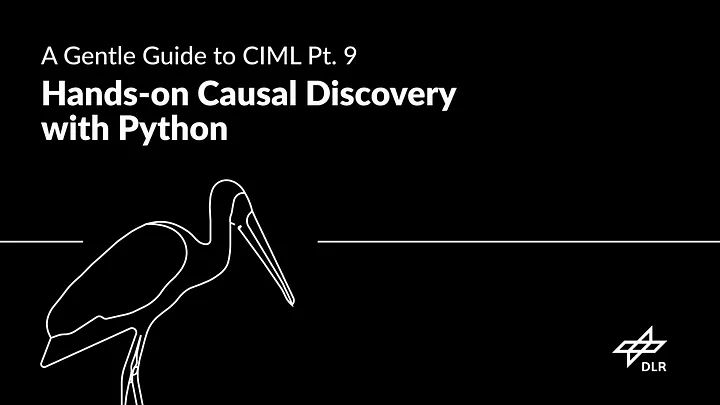

In [ ]:
img("https://miro.medium.com/v2/resize:fit:720/format:webp/1*N7W1tYzyzRdQtfYX81uDIg.png")

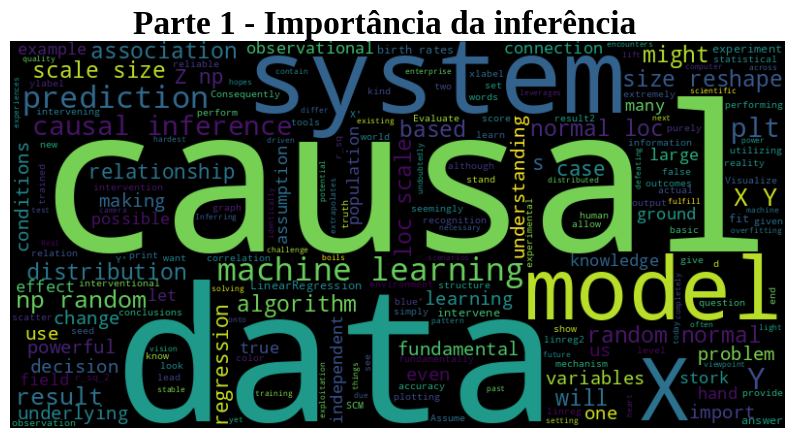

In [ ]:
url = "https://medium.com/causality-in-data-science/why-machine-learning-needs-causality-3d33e512cd37"
text = extract_text_from_url(url)
create_wordcloud_from_text(text, "Parte 1 - Importância da inferência")

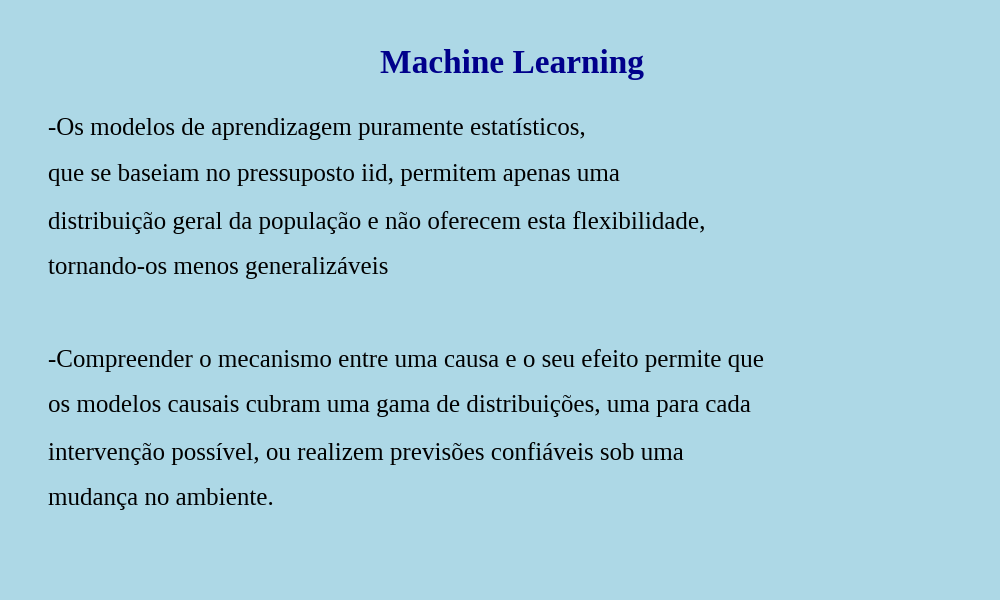

In [ ]:
# @title Slide 1
create_slide("Machine Learning", [
    "-Os modelos de aprendizagem puramente estatísticos,                         ",
    "que se baseiam no pressuposto iid, permitem apenas uma",
    "distribuição geral da população e não oferecem esta flexibilidade,",
    "tornando-os menos generalizáveis", " ",
    "-Compreender o mecanismo entre uma causa e o seu efeito permite que",
    "os modelos causais cubram uma gama de distribuições, uma para cada" ,
    "intervenção possível, ou realizem previsões confiáveis sob uma",
    "mudança no ambiente."
])


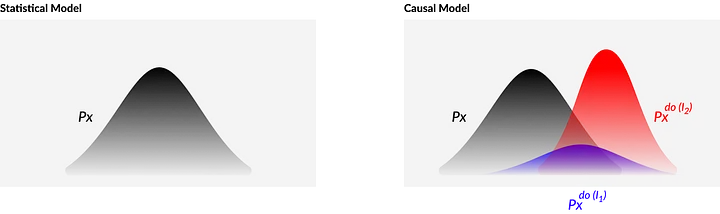

In [ ]:
#imagem 1:
display_image_from_url("https://miro.medium.com/v2/resize:fit:720/format:webp/0*RvRhbZeq479CyOw3")

Ex: Intervenção para eliminar o efeito de Z, de X em Y

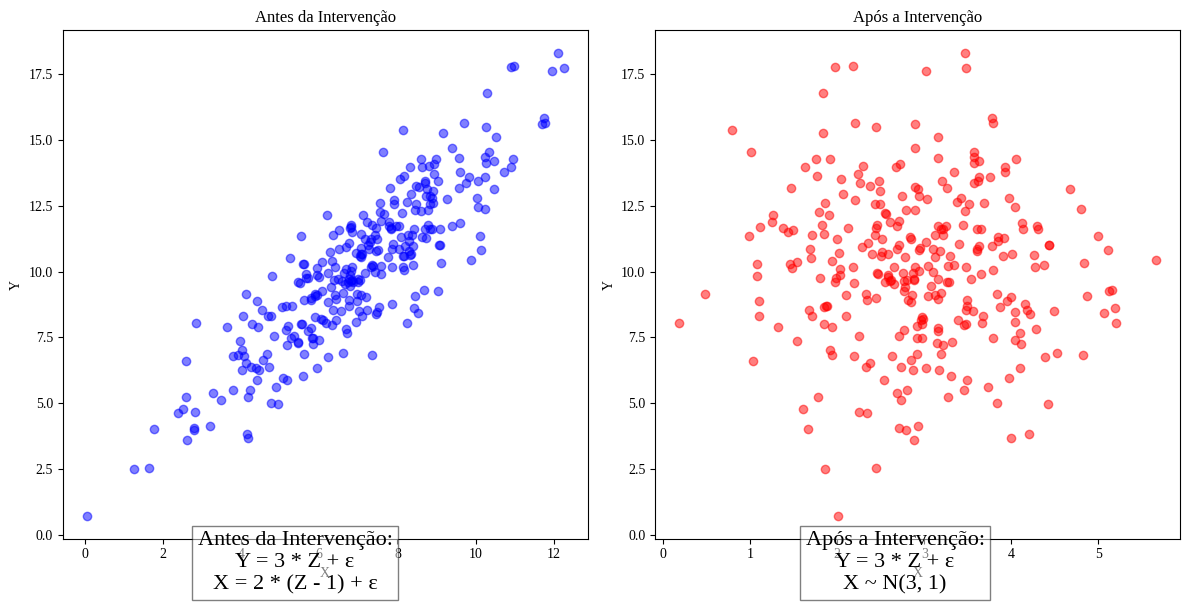

In [ ]:
# @title Intervençao de X em Y, para eliminar o efeito de Z
# Original: Definindo as variáveis do sistema
np.random.seed(10)
Z_original = np.random.normal(loc=3, scale=1, size=300).reshape(-1, 1)
Y_original = 3 * Z_original + np.random.normal(loc=1, scale=0.5, size=300).reshape(-1, 1)
X_original = 2 * (Z_original - 1) + np.random.normal(loc=3, scale=1, size=300).reshape(-1, 1)

# Intervenção: Efeito da intervenção em X
np.random.seed(10)
Z_intervencao = np.random.normal(loc=3, scale=1, size=300).reshape(-1, 1)
Y_intervencao = 3 * Z_intervencao + np.random.normal(loc=1, scale=0.5, size=300).reshape(-1, 1)
X_intervencao = np.random.normal(loc=3, scale=1, size=300).reshape(-1, 1)

# Gráfico de dispersão X vs Y antes da intervenção
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_original, Y_original, color='blue', alpha=0.5)
plt.title('Antes da Intervenção')
plt.xlabel('X')
plt.ylabel('Y')

# Gráfico de dispersão X vs Y após a intervenção
plt.subplot(1, 2, 2)
plt.scatter(X_intervencao, Y_intervencao, color='red', alpha=0.5)
plt.title('Após a Intervenção')
plt.xlabel('X')
plt.ylabel('Y')

# Adicionando as fórmulas como texto na figura
plt.figtext(0.25, 0.01, 'Antes da Intervenção:\nY = 3 * Z + ε\nX = 2 * (Z - 1) + ε', ha='center', fontsize=16, bbox=dict(facecolor='white', alpha=0.5))
plt.figtext(0.75, 0.01, 'Após a Intervenção:\nY = 3 * Z + ε\nX ~ N(3, 1)', ha='center', fontsize=16, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()

plt.show()


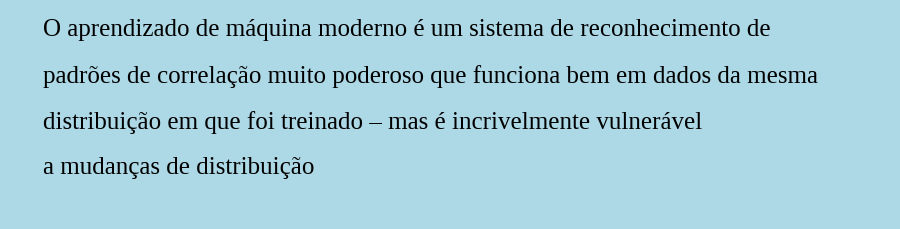

In [ ]:
# @title Slide 2
create_slide("", [
    "O aprendizado de máquina moderno é um sistema de reconhecimento de ",
    "padrões de correlação muito poderoso que funciona bem em dados da mesma",
    "distribuição em que foi treinado – mas é incrivelmente vulnerável ",
    "a mudanças de distribuição"

], figsize=(9, 2.3)
)


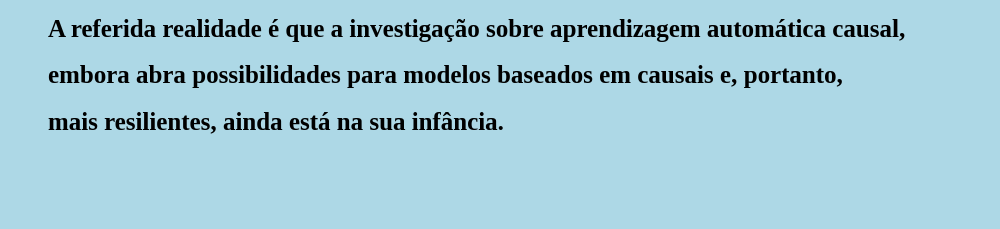

In [ ]:
# @title Slide 3
create_slide("", [
    "*A referida realidade é que a investigação sobre aprendizagem automática causal,",
     "*embora abra possibilidades para modelos baseados em causais e, portanto, ",
    "*mais resilientes, ainda está na sua infância."


], figsize=(10, 2.3)
)


os métodos de inferência causal têm sido desenvolvidos principalmente para dados de baixa dimensão e estruturados relativamente simples e concentram-se principalmente na identificação de relações causais (descoberta causal), ou assumindo-as num modelo causal e quantificando os seus efeitos (estimativa de efeito causal).

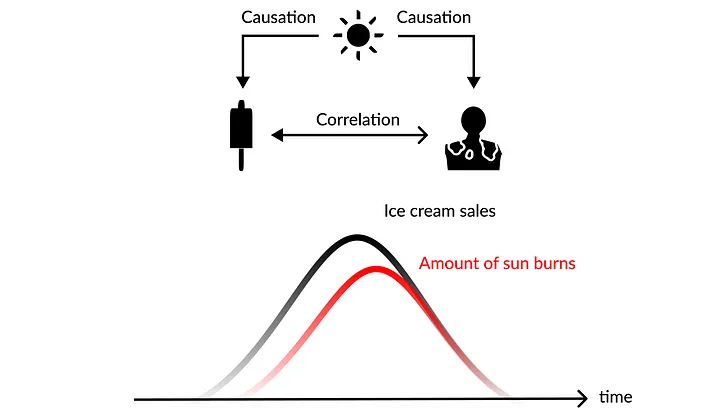

In [ ]:
# @title Imagem 1
url= "https://miro.medium.com/v2/resize:fit:720/format:webp/1*fCIHXRhpIQZC80HhE-Bh_g.png"
display_image_from_url(url)

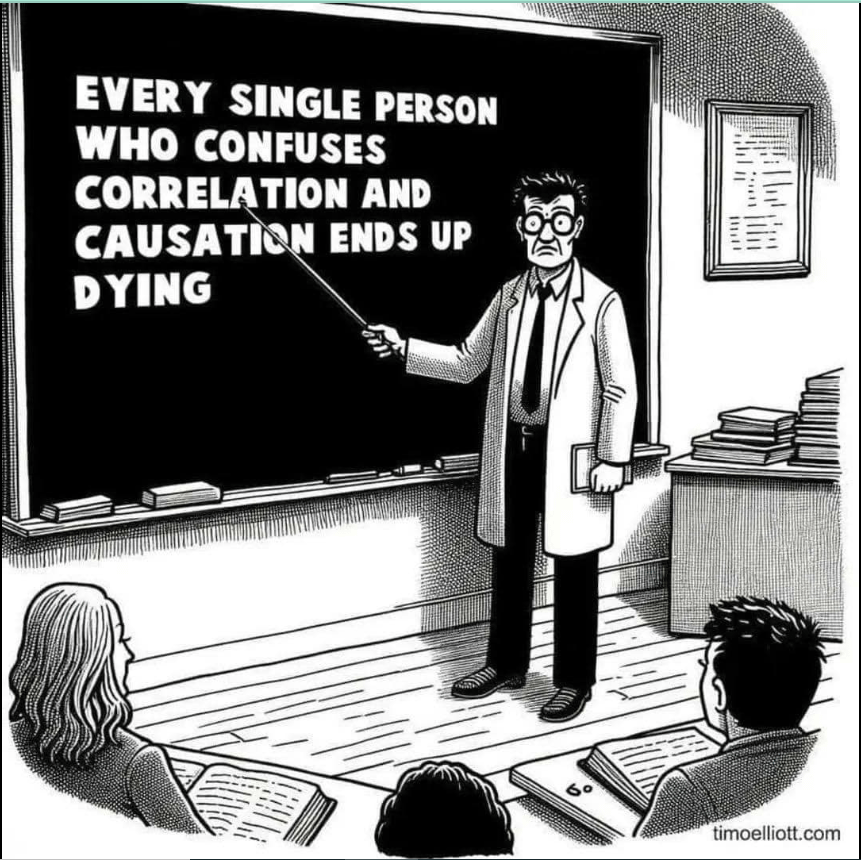

In [ ]:
# @title Imagem 2
url= "https://preview.redd.it/causation-correlation-meme-v0-6jlrcgr3yy0c1.png?width=861&format=png&auto=webp&s=09ce8b9fa01dbc7148bedbe10cacae48e5a82d9b"
display_image_from_url(url)

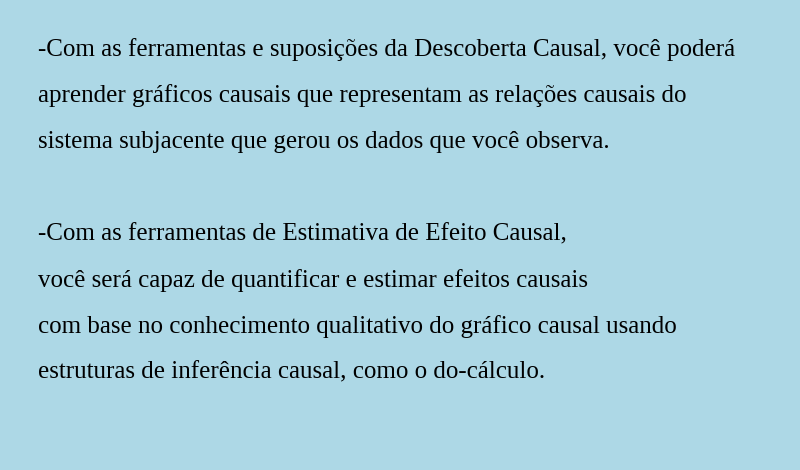

In [ ]:
# @title Slide 3
create_slide("", [
    "-Com as ferramentas e suposições da Descoberta Causal, você poderá ",
    "aprender gráficos causais que representam as relações causais do ",
    "sistema subjacente que gerou os dados que você observa.",
    "",
    "-Com as ferramentas de Estimativa de Efeito Causal, ",
    "você será capaz de quantificar e estimar efeitos causais",
    "com base no conhecimento qualitativo do gráfico causal usando",
    "estruturas de inferência causal, como o do-cálculo."


], figsize=(8, 4.7)
)


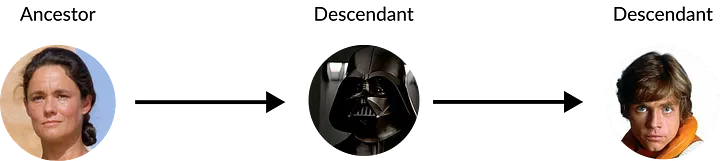

In [ ]:
# @title Imagem 3
display_image_from_url("https://miro.medium.com/v2/resize:fit:720/format:webp/0*0f0O5cisJ_YYtu5b")

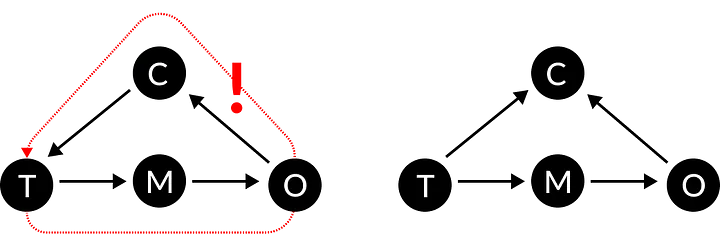

In [ ]:
# @title Imagem 4
display_image_from_url("https://miro.medium.com/v2/resize:fit:720/format:webp/0*w_SyaldgXzSQCG5T")

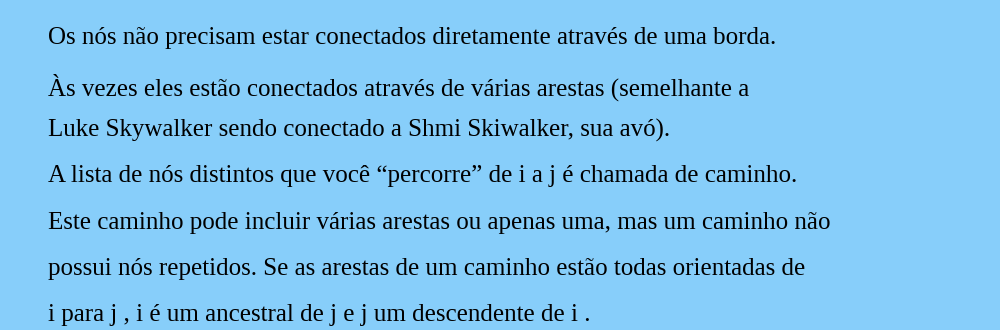

In [ ]:
# @title Slide 5
create_slide("", [
    "Os nós não precisam estar conectados diretamente através de uma borda.",
     "Às vezes eles estão conectados através de várias arestas (semelhante a",
     "Luke Skywalker sendo conectado a Shmi Skiwalker, sua avó).",
    "A lista de nós distintos que você “percorre” de i a j é chamada de caminho.",
    "Este caminho pode incluir várias arestas ou apenas uma, mas um caminho não",
    "possui nós repetidos. Se as arestas de um caminho estão todas orientadas de ",
    "i para j , i é um ancestral de j e j um descendente de i ."


], figsize=(10, 3.3), background_color='lightskyblue'
)


###Paradoxo de Simpson

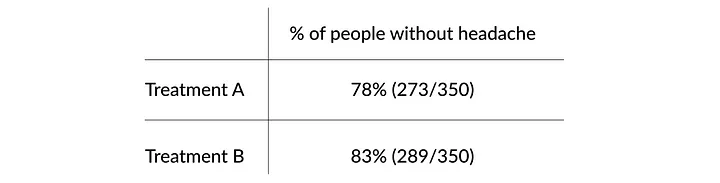

In [ ]:
display_image_from_url("https://miro.medium.com/v2/resize:fit:720/format:webp/1*3vd0Co_m8drtjD38xXQXqA.png", "Paradoxo de Simpson")

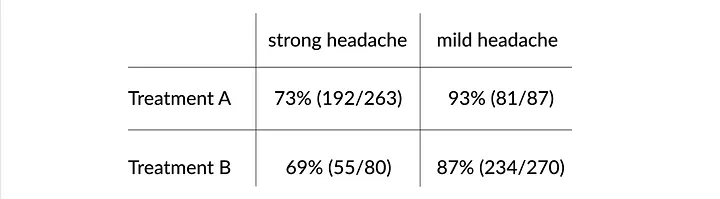

In [ ]:
display_image_from_url("https://miro.medium.com/v2/resize:fit:720/format:webp/1*MIDziQDrwGaIoLReeBODig.png")

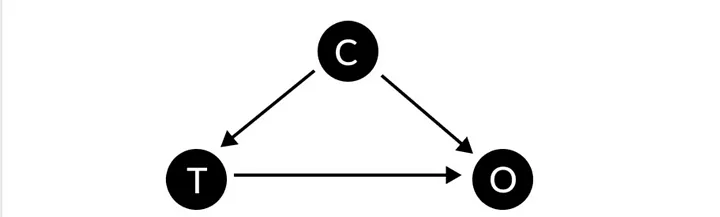

In [ ]:
display_image_from_url("https://miro.medium.com/v2/resize:fit:720/format:webp/1*fyokX4TeY66ZkiH-Ep6oMA.png")

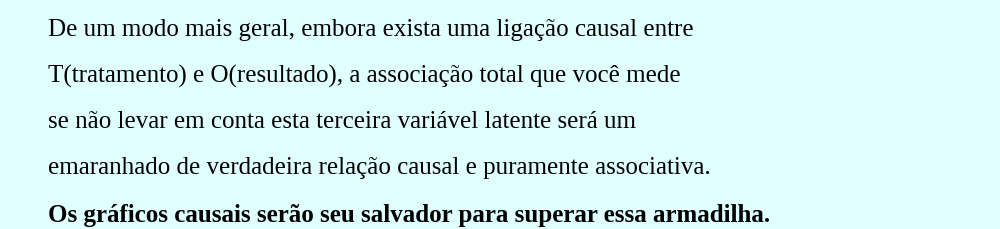

In [ ]:
# @title slide 6
create_slide("", [
    "De um modo mais geral, embora exista uma ligação causal entre ",
    "T(tratamento) e O(resultado), a associação total que você mede ",
    "se não levar em conta esta terceira variável latente será um ",
    "emaranhado de verdadeira relação causal e puramente associativa. " ,
    "O*s gráficos causais serão seu salvador para superar essa armadilha."


], figsize=(10, 2.3), background_color='lightcyan'
)


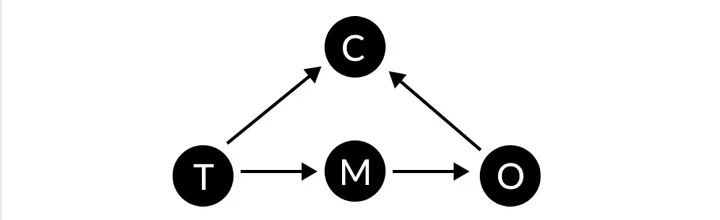

In [ ]:
display_image_from_url("https://miro.medium.com/v2/resize:fit:720/format:webp/1*rLNZKICEz-GcZSl1ike1HA.png","Mediador","o nó M repassa (ou medeia) o fluxo da associação entre T e O. Isso o torna um mediador . Assim, quando queremos bloquear a associação entre T e O, basta condicionar M. Em outras palavras, simplesmente mantemos M constante e como consequência separamos a variação em T da variação em O")

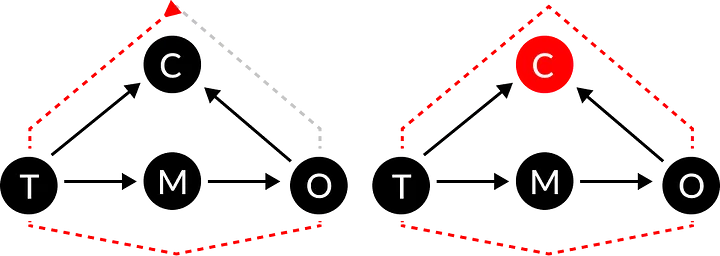

In [ ]:
display_image_from_url("https://miro.medium.com/v2/resize:fit:720/format:webp/0*7vuXJLdSPWgC4VF_","Colisores","Imagine que quando você está namorando homens, parece que a maioria dos homens legais não são realmente bonitos, enquanto os bonitos são em sua maioria idiotas. Em outras palavras, você mediria uma correlação negativa muito alta entre ser bonito e ser legal. Mas por que? A razão é que você acaba de namorar homens solteiros. <br>Sem aconselhá-lo a começar a tentar namorar homens em relacionamentos, isso significa que você ainda ignorou uma terceira variável nesta análise de correlação, nomeadamente a disponibilidade.<br><br> Cientificamente falando, você foi vítima do chamado “viés de seleção”. Em nosso exemplo de mentirinha, a disponibilidade dos homens (estejam eles em um relacionamento ou não) é determinada por eles serem bonitos e legais. Os homens disponíveis, ou seja, os “restantes”, ou não são muito bonitos ou não são muito gentis, ou nem mesmo ambos. Ou seja, em vez de considerar toda a distribuição dos homens (o que incluiria os que estão num relacionamento), considera-se apenas uma distribuição onde se condicionou a variável “disponibilidade” a “solteiro”.", text_size=20)

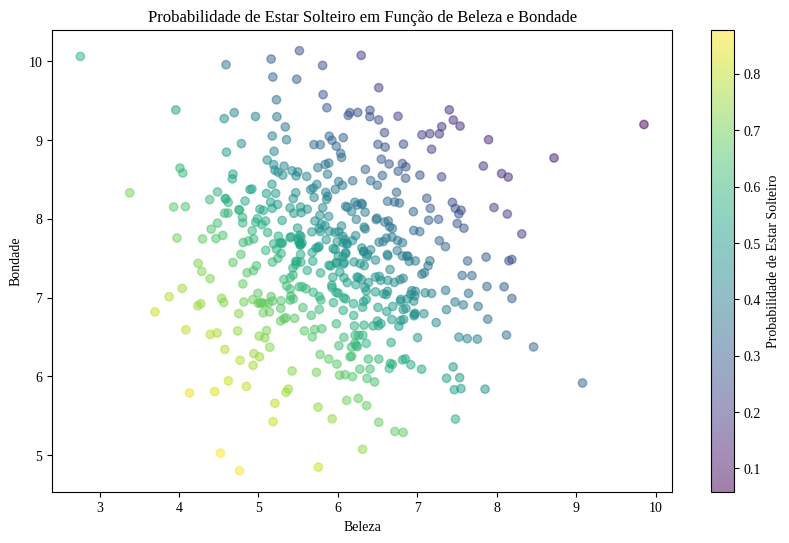

In [ ]:
# @title Exemplo: Beleza e Bondade em homens
# Definindo as variáveis
np.random.seed(42)
n = 500

# Beleza e Bondade são inicialmente independentes
beleza = np.random.normal(size=n)
bondade = np.random.normal(size=n)

# Disponibilidade é influenciada por Beleza e Bondade
# Homens bonitos e bondosos têm menor probabilidade de estar disponíveis
disponibilidade = 1 / (1 + np.exp(0.5 * (beleza + bondade)))

# Selecionar apenas homens disponíveis
mask_disponivel = (np.random.rand(n) < disponibilidade)
beleza_disponivel = beleza[mask_disponivel]
bondade_disponivel = bondade[mask_disponivel]

# Selecionar apenas homens não disponíveis
mask_nao_disponivel = ~mask_disponivel
beleza_nao_disponivel = beleza[mask_nao_disponivel]
bondade_nao_disponivel = bondade[mask_nao_disponivel]



# Gráfico das probabilidades condicionadas de disponibilidade
plt.figure(figsize=(10, 6))
plt.scatter(beleza+6, bondade+7.5, c=disponibilidade, cmap='viridis', alpha=0.5)
plt.colorbar(label='Probabilidade de Estar Solteiro')
plt.title('Probabilidade de Estar Solteiro em Função de Beleza e Bondade')
plt.xlabel('Beleza')
plt.ylabel('Bondade')
plt.show()


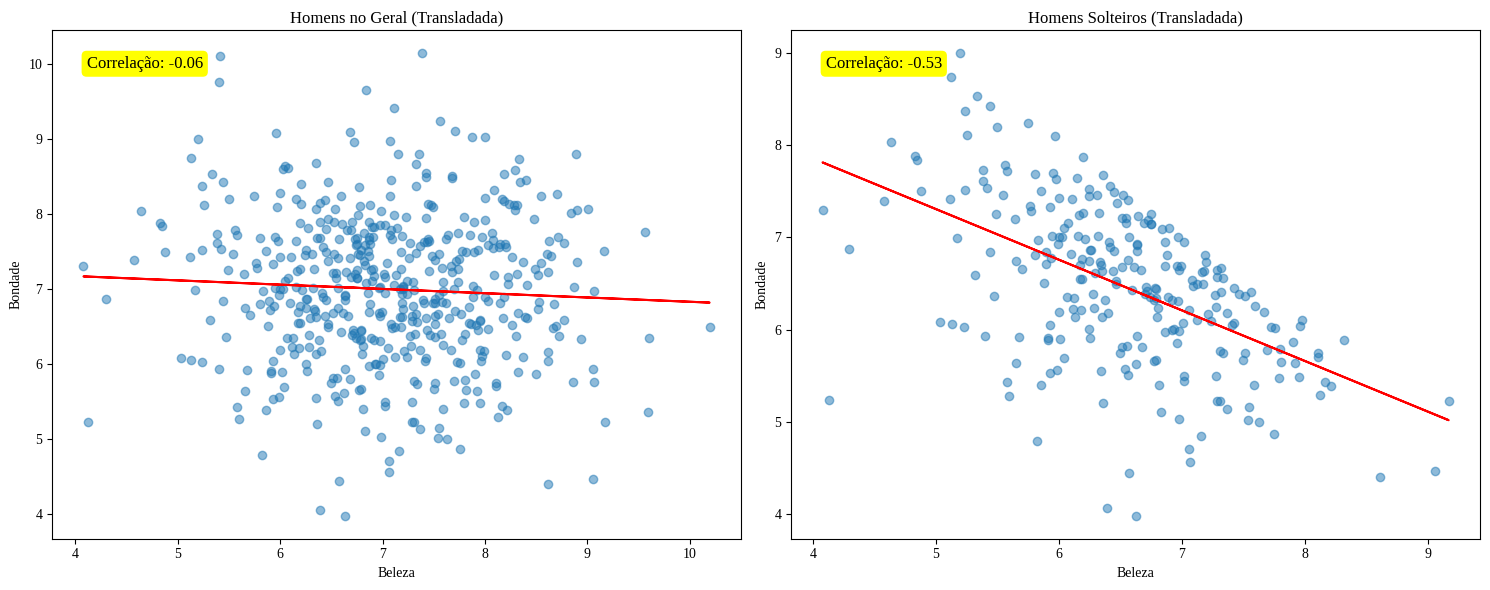

In [ ]:
# @title Correlação negativa
# Definindo as variáveis
n = 500

# Beleza e Bondade são inicialmente independentes
beleza = np.random.normal(size=n)
bondade = np.random.normal(size=n)

# Transladar os dados somando 7 em x e y
beleza_translada = beleza + 7
bondade_translada = bondade + 7

# Probabilidade de estar solteiro diminui significativamente com aumento de beleza e bondade
atributos = beleza_translada * bondade_translada
p_solt = np.exp(-atributos)  # Penalização com base na multiplicação de atributos
p_solt = p_solt / p_solt.max()  # Normalizar para ser uma probabilidade válida entre 0 e 1

# Garantir que 250 homens estejam solteiros
threshold = np.percentile(p_solt, 50)  # Ponto de corte para 50% dos homens
mask_disponivel = p_solt >= threshold
beleza_disponivel_translada = beleza_translada[mask_disponivel]
bondade_disponivel_translada = bondade_translada[mask_disponivel]

# Função para plotar gráficos e linhas de regressão
def plot_regression(x, y, title, ax):
    ax.scatter(x, y, alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel('Beleza')
    ax.set_ylabel('Bondade')

    # Estimar modelo de regressão
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    y_pred = model.predict(x.reshape(-1, 1))

    # Plotar linha de regressão
    ax.plot(x, y_pred, color='red')

    # Calcular e exibir correlação
    correlation = np.corrcoef(x, y)[0, 1]
    ax.text(0.05, 0.95, f'Correlação: {correlation:.2f}', transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='yellow'))

# Plotar gráficos
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Homens no geral transladados
plot_regression(beleza_translada, bondade_translada, 'Homens no Geral (Transladada)', axes[0])

# Homens solteiros transladados
plot_regression(beleza_disponivel_translada, bondade_disponivel_translada, 'Homens Solteiros (Transladada)', axes[1])

plt.tight_layout()
plt.show()


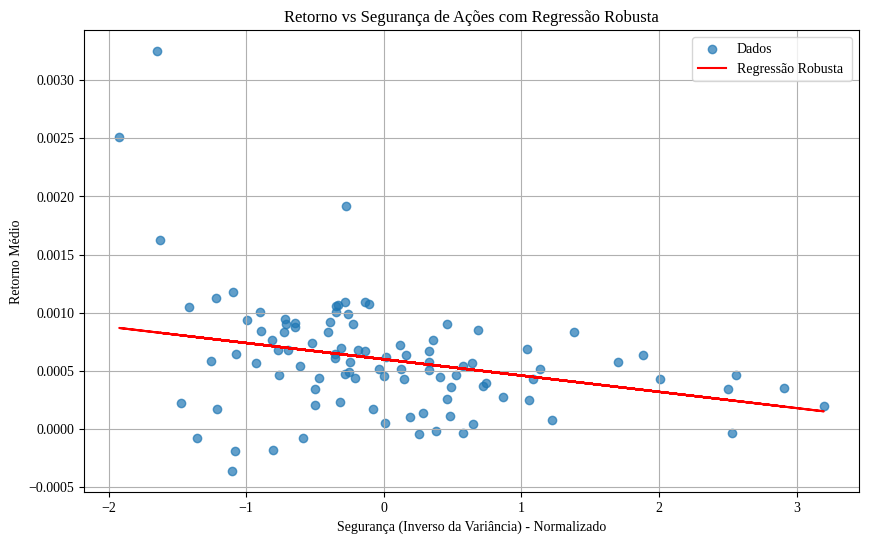

In [ ]:
#@title Exemplo: finanças;
!pip install yfinance
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


# Lista de símbolos de ações
stock_symbols = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'FB', 'TSLA', 'NVDA', 'JPM', 'V', 'JNJ', 'PG', 'UNH', 'HD', 'MA',
                 'INTC', 'PYPL', 'ADBE', 'NFLX', 'CMCSA', 'VZ', 'DIS', 'CSCO', 'ABT', 'CRM', 'BAC', 'KO', 'PEP',
                 'T', 'MRK', 'WMT', 'NKE', 'PFE', 'ABBV', 'ORCL', 'NVS', 'CVX', 'XOM', 'PM', 'AMD', 'IBM', 'QCOM',
                 'ACN', 'MMM', 'AAP', 'HON', 'LLY', 'LMT', 'DHR', 'TXN', 'TMO', 'NEE', 'UNP', 'LIN', 'LOW', 'BKNG',
                 'AMT', 'GOOG', 'UPS', 'SBUX', 'RTX', 'CAT', 'NOW', 'ANTM', 'ADP', 'GS', 'FIS', 'ISRG', 'AXP', 'BDX',
                 'BIIB', 'MDT', 'MS', 'VRTX', 'CI', 'PLD', 'INTU', 'BLK', 'MMM', 'ADI', 'AON', 'SO', 'D', 'CVS',
                 'SYK', 'GS', 'SPGI', 'TMUS', 'ZTS', 'TFC', 'REGN', 'GM', 'CCI', 'DD', 'AEP', 'ECL', 'BDX', 'BK',
                 'DUK', 'EMR', 'EW', 'GILD', 'FDX', 'MET', 'GD']

# Datas de início e fim
start_date = '2020-01-01'
end_date = '2024-06-05'

# Baixando os dados das ações
stock_data = pd.DataFrame()

for symbol in stock_symbols:
    #print(f"Baixando {symbol}...")
    try:
        data = yf.download(symbol, start=start_date, end=end_date)
        if not data.empty:
            stock_data[symbol] = data['Adj Close']
        else:
            pass #print(f"Sem dados para {symbol}")
    except Exception as e:
        pass
        #print(f"Erro ao baixar {symbol}: {e}")


stock_returns = stock_data.pct_change().dropna()


clear_output()

import numpy as np
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Calculando a "segurança" (inverso da variância)
safety = 1 / stock_returns.var()

# Convertendo para arrays numpy
safety_np = safety.values.reshape(-1, 1)
returns_np = stock_returns.mean().values

# Normalizando os dados
scaler = StandardScaler()
safety_scaled = scaler.fit_transform(safety_np)

# Ajustando o modelo de regressão robusta
model = HuberRegressor().fit(safety_scaled, returns_np)

# Coeficiente da regressão
coeficiente = model.coef_[0]

# Prevendo os valores
returns_pred = model.predict(safety_scaled)

# Plotando o gráfico de retorno vs segurança com a linha de regressão
plt.figure(figsize=(10, 6))
plt.scatter(safety_scaled, returns_np, alpha=0.7, label='Dados')
plt.plot(safety_scaled, returns_pred, color='red', label=f'Regressão Robusta ')
plt.xlabel('Segurança (Inverso da Variância) - Normalizado')
plt.ylabel('Retorno Médio')
plt.title('Retorno vs Segurança de Ações com Regressão Robusta')
plt.legend()
plt.grid(True)
plt.show()


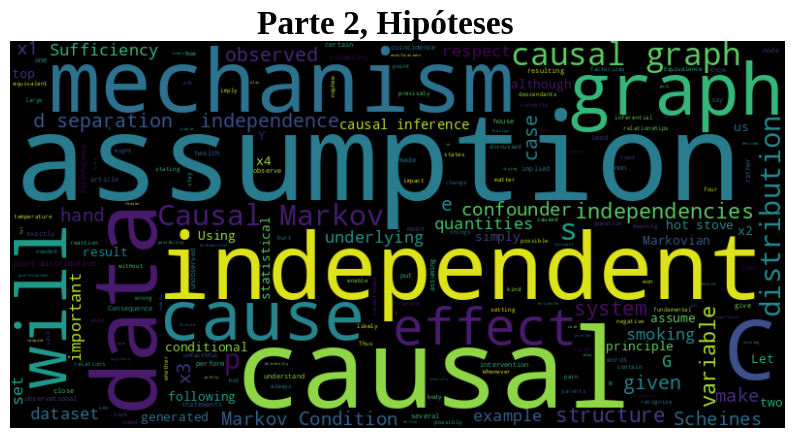

In [ ]:
url="https://medium.com/causality-in-data-science/assumptions-for-causal-discovery-cc194d607a14"

create_wordcloud_from_text(extract_text_from_url(url), "Parte 2, Hipóteses")


###D-Separação

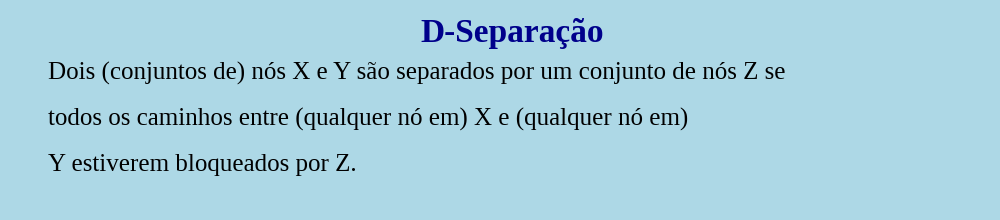

In [ ]:
# @title Slide 7
create_slide("D-Separação", [
    "Dois (conjuntos de) nós X e Y são separados por um conjunto de nós Z se ",
    "todos os caminhos entre (qualquer nó em) X e (qualquer nó em) ",
    "Y estiverem bloqueados por Z. ",


], figsize=(10, 2.2), text ="Este é o caso se for dado Z, uma das seguintes afirmações é verdadeira para cada caminho: <br>1- Existe um nó de bifurcação ou mediador ao longo do caminho, que está condicionado.<br>2-Existe um colisor C ao longo do caminho, no qual e em cujos descendentes não está condicionado."
)


In [ ]:
# @title 8
create_slide("independência da causa e do mecanismo :", [
    " ",



], figsize=(10, 0.3), text= ("A causa C de um sistema e o mecanismo M pelo qual a causa provoca o efeito E são independentes um do outro. distribuição conjunta p(c,e) nos dará dois componentes modulares autônomos :<br> p( c ) sendo a distribuição da causa e p(e|c ) sendo o mecanismo.<b><br>p(c,e) = p(e|c) * p( c ).")
)


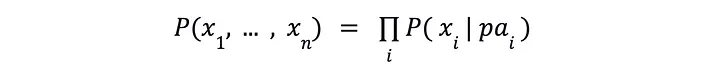

In [ ]:
# @title 9
url ='https://miro.medium.com/v2/resize:fit:720/format:webp/1*mpAZnFVDRCWuVB0A7qlq_w.png'
display_image_from_url(url, "Fatoração de Rede Bayesiana", "A distribuição conjunta de todas as variáveis ​​observadas é fatorada no produto de todos os mecanismos causais.", text_size=22)

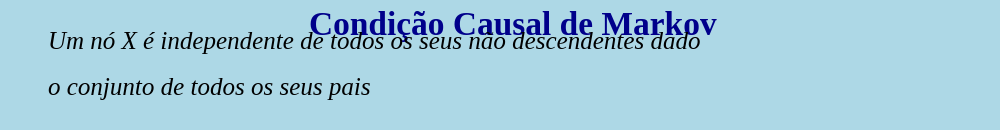

In [ ]:
create_slide("Condição Causal de Markov", [
    "_Um nó X é independente de todos os seus não descendentes dado ",
    "_o conjunto de todos os seus pais",
], figsize=(10, 1.3) )

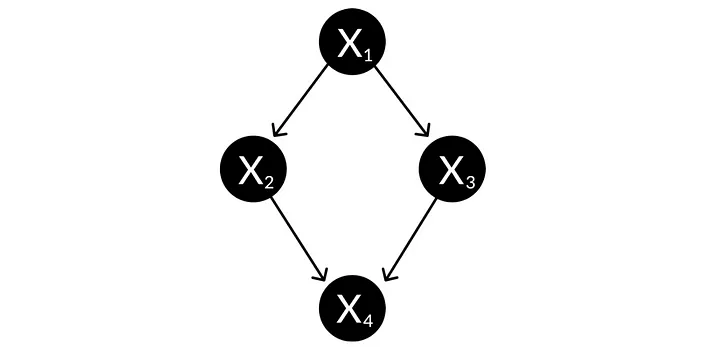

In [ ]:
img("https://miro.medium.com/v2/resize:fit:720/format:webp/1*n3kC_Hih3B3RYJhDFYFKCQ.png", "","“x2 tem que ser independente de x3 condicionado em x1” e <br>“x1 é independente de x4 condicionado em x2 e x3”.")

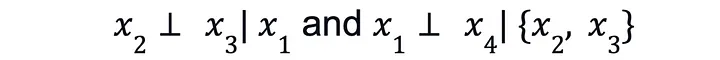

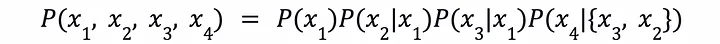

In [ ]:
img("https://miro.medium.com/v2/resize:fit:720/format:webp/1*4cZLwf5MCuNnvSvhZLfdqg.png")
img("https://miro.medium.com/v2/resize:fit:720/format:webp/1*PpFc4mg0agVkdBc8iWI5_w.png")

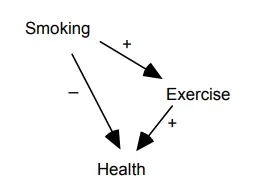

In [ ]:
img("https://miro.medium.com/v2/resize:fit:514/format:webp/0*6yjf0Nk72FEH3jLQ", "Exemplo", "Suponha que fumar levasse as pessoas a praticar mais desporto, o que poderia então anular totalmente os efeitos negativos do tabagismo na saúde se os efeitos fossem igualmente grandes por coincidência. <br>Assim, embora Saúde e Tabagismo não possam ser separados, são independentes na distribuição dos dados.")

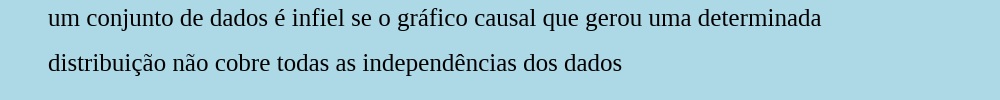

In [ ]:
#@title Fidelidade
create_slide("", ["um conjunto de dados é infiel se o gráfico causal que gerou uma determinada",
 "distribuição não cobre todas as independências dos dados"],figsize=(10,1), text=("Por outro lado, ao assumir que os dados são fiéis, assumimos que um gráfico causal reflete todas as independências probabilísticas nas suas d-separações. Portanto, assumimos que quando há alguma independência nos dados, ela é causada pela estrutura subjacente do gráfico que os gerou, e não por alguma coincidência aleatória. ")

)


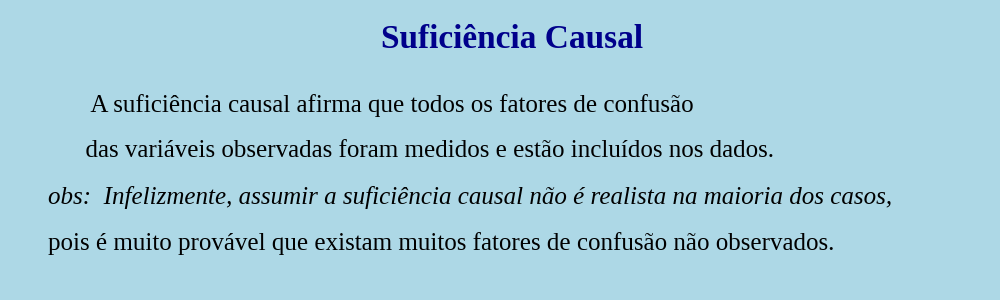

In [ ]:
#@title Suficiencia Causal
create_slide("Suficiência Causal", [
    "       A suficiência causal afirma que todos os fatores de confusão  ",
    "      das variáveis observadas foram medidos e estão incluídos nos dados.",
    "obs: _ Infelizmente, assumir a suficiência causal não é realista na maioria dos casos,",
    "pois é muito provável que existam muitos fatores de confusão não observados. "


], figsize=(10, 3)
)


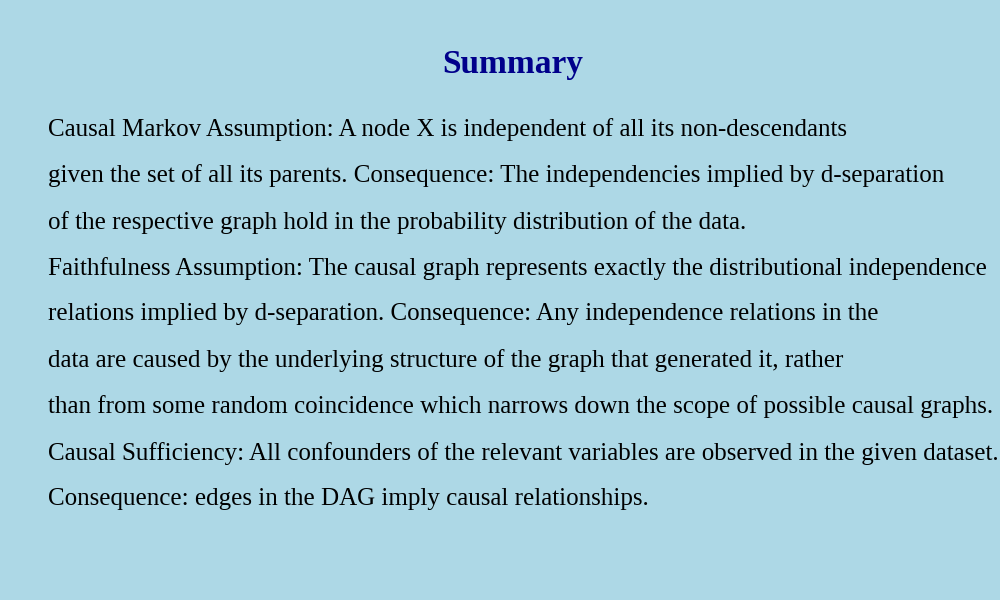

In [ ]:
#@title Resumo
slide("Summary", ["Causal Markov Assumption: A node X is independent of all its non-descendants",
            "given the set of all its parents. Consequence: The independencies implied by d-separation ",
           "of the respective graph hold in the probability distribution of the data.",
            "Faithfulness Assumption: The causal graph represents exactly the distributional independence ",
           "relations implied by d-separation. Consequence: Any independence relations in the ",
           "data are caused by the underlying structure of the graph that generated it, rather",
           "than from some random coincidence which narrows down the scope of possible causal graphs.",
            "Causal Sufficiency: All confounders of the relevant variables are observed in the given dataset.",
           "Consequence: edges in the DAG imply causal relationships."])

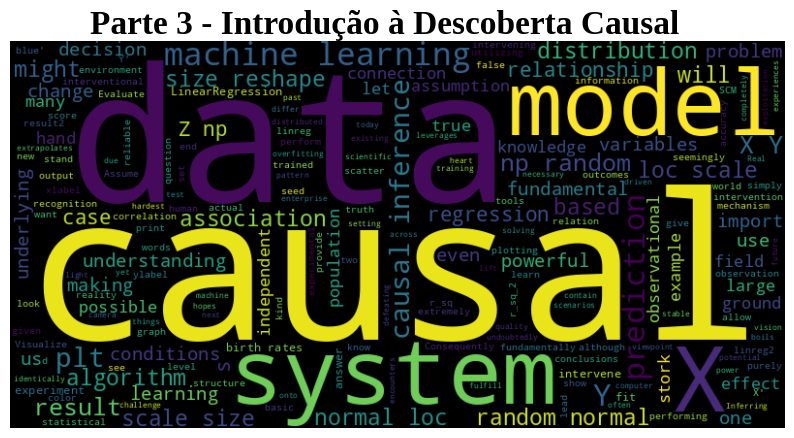

In [ ]:
extract_text_from_url("https://medium.com/causality-in-data-science/introducing-conditional-independence-and-causal-discovery-77919db6159c")
create_wordcloud_from_text(text, "Parte 3 - Introdução à Descoberta Causal")

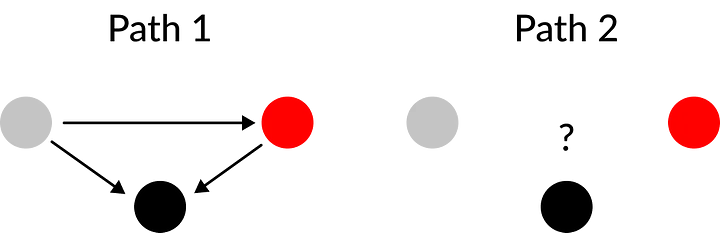

In [ ]:
img("https://miro.medium.com/v2/resize:fit:720/format:webp/0*fVYYMY9WP6Va9eMX", "Estimativa de Efeito . . . . . . . . . . . . . . .Descoberta Causal")

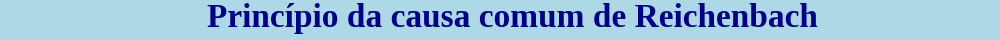

In [ ]:

create_slide("Princípio da causa comum de Reichenbach", [
    "",
], figsize=(10, .4), text= "Se X e Y estão estatisticamente relacionados (= correlacionados) e os dados são imparciais, então<br>1- X é a causa de Y ou<br>2-Y é a causa de X, ou<br>3-existe uma causa comum Z que causa X e Y."
)


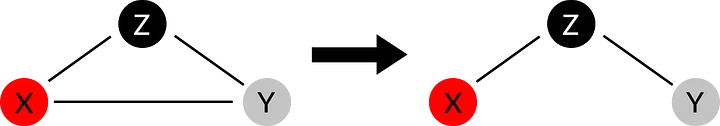

In [ ]:
img("https://miro.medium.com/v2/resize:fit:720/format:webp/0*T0iYpGm9LFm17yWW", "", "Usamos testes estatísticos de independência condicional para testar se existe algum tipo de relação entre X e Z. Se nenhuma dependência for encontrada, ou seja, os dois são estatisticamente independentes, então a condição de Fidelidade nos diz que não há relação causal e nós podemos remover a aresta do nosso gráfico.")

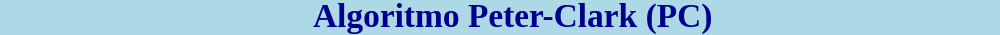

In [ ]:
create_slide("Algoritmo Peter-Clark (PC)", [
    "",


], figsize=(10, .35), text= " 1- Faça um nó para cada variável observada <br><br> 2- Comece com todos eles conectados entre si.<br><br>3- Elimine tantas arestas quanto possível usando testes de independência condicional. Mais especificamente, remova as arestas XY se X for independente de Y dado um conjunto de condicionamento S. A etapa 3 é um procedimento repetitivo, começando com S como o conjunto vazio S={} e aumentando seu tamanho (cardinalidade) em 1 para cada iteração.<br><br>4- Estabeleça direções (causais) para cada aresta restante usando colisores, a suposição de que não há ciclos e quaisquer outras suposições que você possa usar, como ordem de tempo."
, text_size=20)


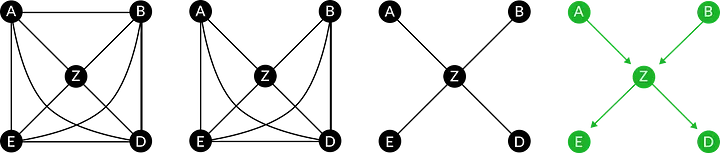

In [ ]:
url='https://miro.medium.com/v2/resize:fit:720/format:webp/0*lv9oNwpKkxbk0U0F'
img(url, "Identificação do Esqueleto", "1-Recebemos um conjunto de dados com cinco variáveis ​​ABZED (veja a figura abaixo). Conforme descrito anteriormente, começamos com o gráfico totalmente conectado. Como primeiro passo para identificar as potenciais relações causais, testamos o condicionamento de independência no conjunto vazio. Como pode ser visto no gráfico causal verdadeiro (marcado em verde) usando as regras de separação d , A e B são independentes. Consequentemente, a aresta entre A e B é removida. <br><br>2-A seguir, testamos a independência condicional usando um conjunto de condicionamento contendo um nó, por exemplo, S={Z}. Isso leva à remoção das arestas AE, AD, ED, BD e BE. A realização de mais testes de independência condicional condicionados em A ou B não levará à remoção de mais arestas. Assim, convergimos para o que assumimos ser o esqueleto real do verdadeiro gráfico causal. O algoritmo PC escolhe os conjuntos de condicionamento S de forma inteligente, selecionando apenas subconjuntos de nós adjacentes dos dois nós a serem testados.<br><br>3- Convergindo para esta representação gráfica, descobrimos as direções causais. Uma maneira de conseguir isso é bastante óbvia. É a exploração de dependências de tempo. Se A acontecer antes de Z, a seta vai de A a Z. <b>Se isso não for possível, as estruturas do colisor podem ajudar.<br><br>", text_size=18)

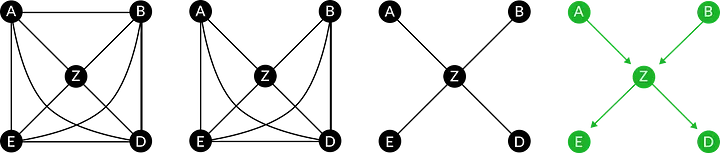

In [ ]:
url='https://miro.medium.com/v2/resize:fit:720/format:webp/0*lv9oNwpKkxbk0U0F'
img(url, "Triplos não blindados", "Um triplo como AZB não é blindado se<br>(i) a aresta AB foi removida na fase anterior do esqueleto do PC, e<br>(ii) existem ligações entre AZ e ZB.<br><br>Agora, a regra do colisor diz que se Z não estava no conjunto de condicionamento (também chamado de conjunto de separação) do teste estatístico pelo qual a ligação entre A e B foi removida na fase de descoberta do esqueleto, então as setas só podem apontar para Z.<br><br> senão haveria uma dependência entre A e B (por separação d), mas não medimos nenhuma.<br><br>", text_size=18)

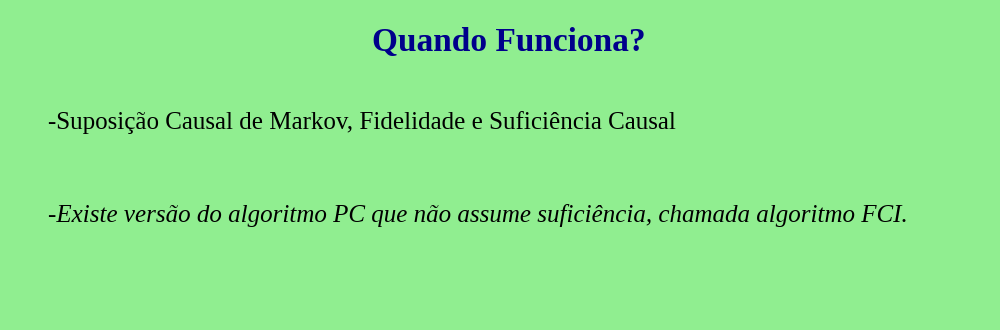

In [ ]:
create_slide("Quando Funciona? ", ["",
    "-Suposição Causal de Markov, Fidelidade e Suficiência Causal  ",
    "", "-_Existe versão do algoritmo PC que não assume suficiência, chamada algoritmo FCI."


], figsize=(10, 3.3), background_color='lightgreen'
)


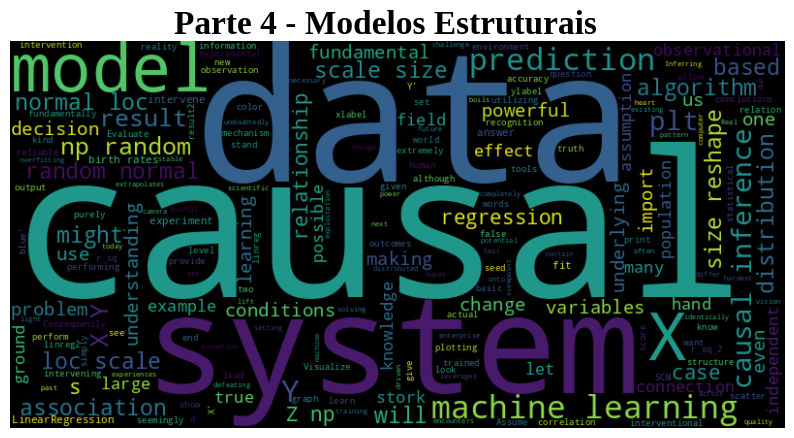

In [ ]:
url= 'https://medium.com/causality-in-data-science/structural-causal-models-a-quick-introduction-1ab49259e921'
extract_text_from_url(url)
create_wordcloud_from_text(text, "Parte 4 - Modelos Estruturais")

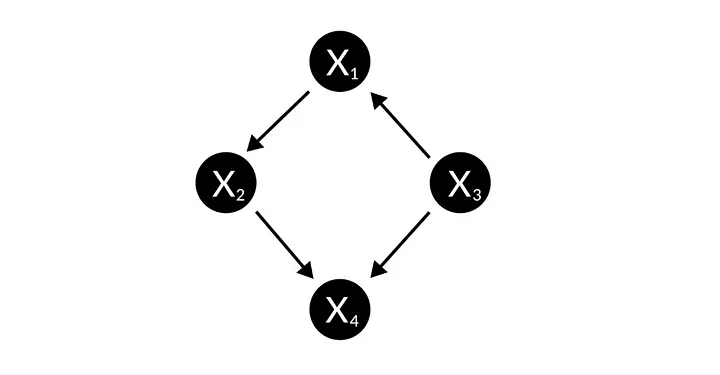

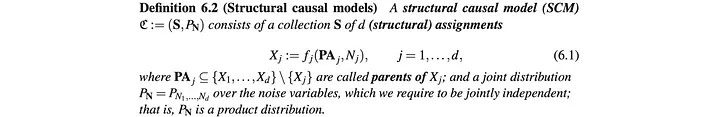

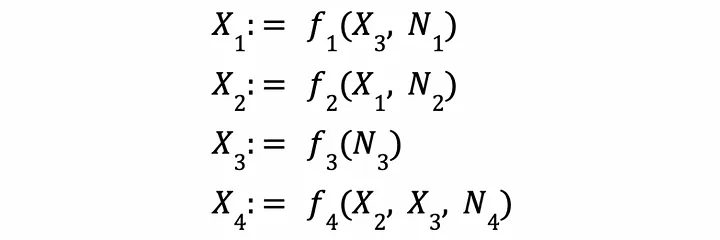

In [ ]:
url="https://miro.medium.com/v2/resize:fit:720/format:webp/1*JFWKJmACu4So8sZehzYApA.png"
img("https://miro.medium.com/v2/resize:fit:720/format:webp/1*DBorg8KY0L_26rzvUvxl6g.png")
img("https://miro.medium.com/v2/resize:fit:720/format:webp/1*_1iHWZ6ui5Ml92avsv_V-w.png")
img(url,"SCM", "Em um SCM, todas as quatro variáveis ​​terão sua própria equação, descrevendo o mecanismo funcional que explica como os pais de uma variável influenciam a própria variável. Mas os SCMs não incluem apenas a influência dos pais, porque queremos que as relações causais sejam descritas de forma probabilística. Ou seja, em vez de dizer que, sempre que X muda 1 unidade, Y muda 5 unidades, reconhecemos que haverá algum ruído aleatório (N) que poderá alterar o efeito real de uma forma ou de outra<br><br><b>os termos de ruído devem ser independentes. ")

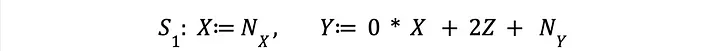

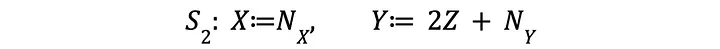

In [ ]:
#@title Navalha de Occan:
img("https://miro.medium.com/v2/resize:fit:720/format:webp/1*n7lb2DoCr7crucdXzYZ1nQ.png","Minimalidade estrutural","deve ser reescrito em:")
img("https://miro.medium.com/v2/resize:fit:720/format:webp/1*ya-gyIobola4lDDQT_j_ww.png","","Minimalidade Estrutural garante que cada aresta que desenhamos realmente corresponda a efeitos causais diferentes de zero.")

####**A independência de causa e mecanismo em SCMs**
Nesse sentido, a função f_j é o mecanismo que conecta X_j a todos os seus pais. Em outras palavras, f_j é o mecanismo pelo qual X_j é causado.

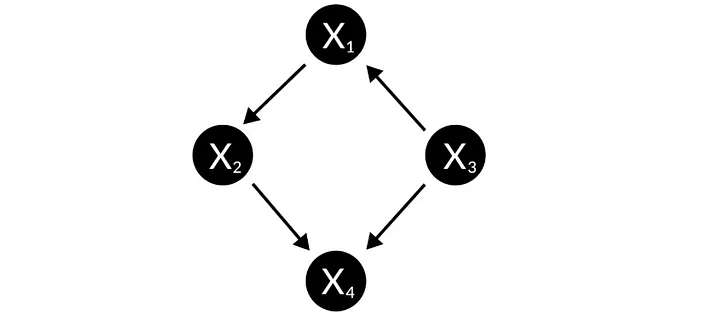

In [ ]:
url="https://miro.medium.com/v2/resize:fit:720/format:webp/1*gwOQgymiAJhuWxUsMoq29w.png"
img(url, "Como aprender modelos causais estruturais", "Suponha que já encontramos o gráfico causal que descreve nosso sistema por meio de um processo anterior de descoberta causal, e gostaríamos de aprender o SCM mais refinado.<br><br>Portanto sabemos que X_1 depende de X_3, mas agora queremos identificar a atribuição estrutural X_1:=f_1(X_3, N_1).<br><br>Por exemplo, poderíamos aprender f_1 usando MQO, árvores de decisão, RNAs e assim por diante com as variáveis ​​corretas.<br><br>")

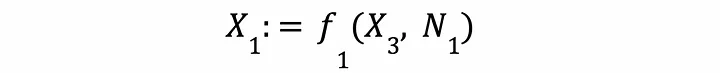

In [ ]:
img("https://miro.medium.com/v2/resize:fit:720/format:webp/1*6-HZlU3no82bSl721xUhZA.png","","Por exemplo, digamos que você detectou uma dependência de X_1 em X_3 em um processo anterior de descoberta causal. Além disso, você tem motivos para presumir que o link é altamente não linear. Você pode então treinar uma rede neural para aprender a função não linear, como já fez muitas vezes antes")

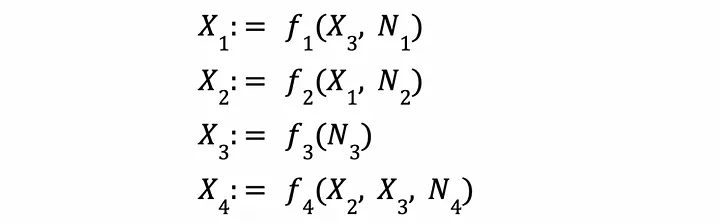

In [ ]:
img("https://miro.medium.com/v2/resize:fit:720/format:webp/1*haH0VyXwq03VuQDkbAE56Q.png","","Intervir não é selecionar, é obrigar todas as instâncias a assumirem esse valor.<br><br> Consequentemente, o termo P(Y|do(X = 2)) , que expressa a distribuição de probabilidade de Y se X for definido como 2, geralmente não é igual à probabilidade condicional P(Y|X = 2). <br><br> ")

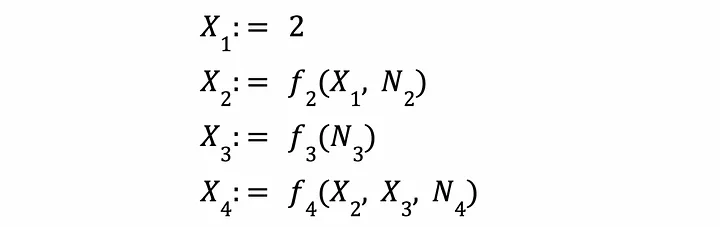

In [ ]:
url="https://miro.medium.com/v2/resize:fit:720/format:webp/1*SvlFqUAG0ga0sggw0GwBEw.png"
img(url, "O efeito de uma intervenção difícil do(X_1=2) pode ser modelado pela seguinte alteração:", "O efeito da alteração de X_1 irá então “propagar-se” por todo o sistema e alterará o resultado de todos os seus descendentes, neste caso X_2 e X_4.<br><br>Este novo SCM implica uma nova distribuição, a distribuição intervencionista.<br><br> Este é um dos grandes benefícios do aprendizado de máquina “infundido” causal. Podemos fazer essas adaptações e ainda ter um modelo sólido mesmo, ou especialmente, quando enfrentamos mudanças severas na distribuição.")

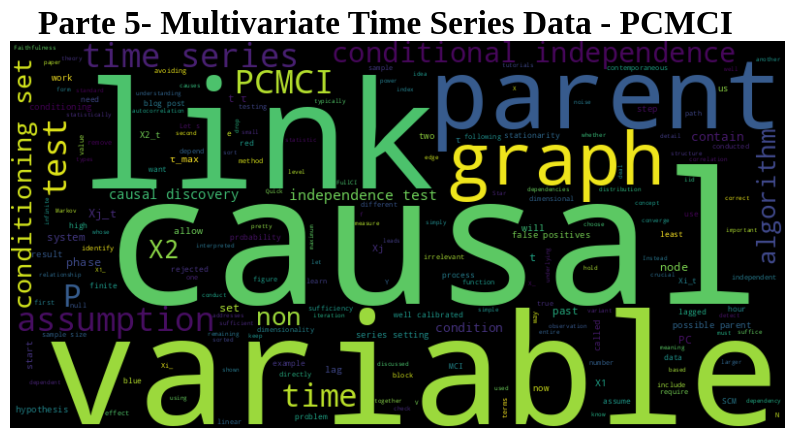

In [ ]:
url= "https://medium.com/causality-in-data-science/causal-discovery-with-multivariate-time-series-data-a3f7ffc16747"
create_wordcloud_from_text(extract_text_from_url(url), "Parte 5- Multivariate Time Series Data - PCMCI")

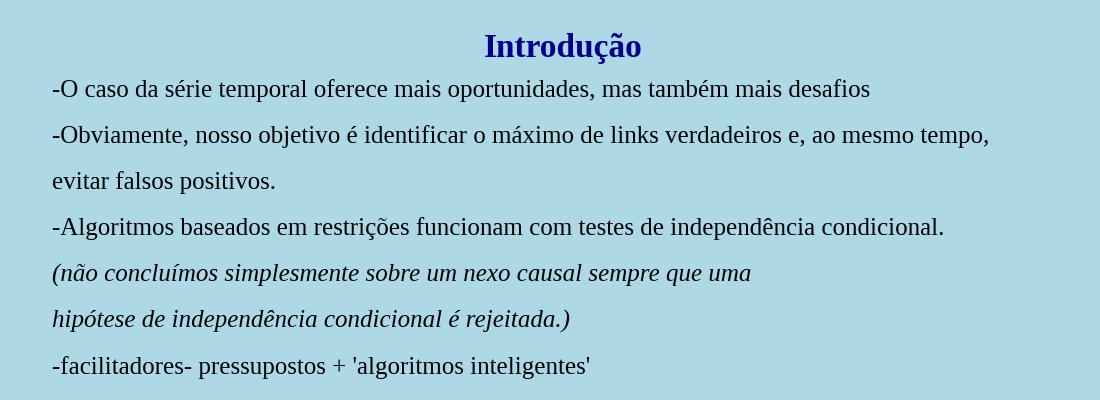

In [ ]:
slide("Introdução",["-O caso da série temporal oferece mais oportunidades, mas também mais desafios",
          "-Obviamente, nosso objetivo é identificar o máximo de links verdadeiros e, ao mesmo tempo,",
          "evitar falsos positivos.",
          "-Algoritmos baseados em restrições funcionam com testes de independência condicional. ",
          "(não concluímos simplesmente sobre um nexo causal sempre que uma_ ",
          "hipótese de independência condicional é rejeitada._)",
          "-facilitadores- pressupostos + 'algoritmos inteligentes'"


          ], figsize= (11, 4) )

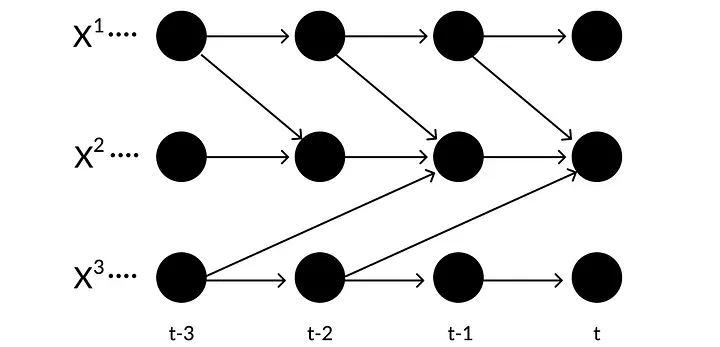

In [ ]:
url="https://miro.medium.com/v2/resize:fit:720/format:webp/1*Lm1T0pyJ6XDfX6EaCkA8MA.png"
img(url, "Generalização DAGs para TS", "Indexamos cada observação no tempo e permitimos (múltiplas) dependências entre variáveis ​​em diferentes intervalos de tempo, incluindo uma ligação de uma variável para si mesma num momento posterior<br><br>Por exemplo, X1 causa diretamente X2 após uma hora e X3 causa diretamente X2 após duas horas e todas as variáveis ​​são causadas pelo seu passado imediato")

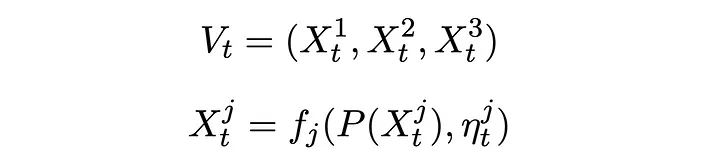

In [ ]:
url= "https://miro.medium.com/v2/resize:fit:720/format:webp/1*L0gH8cRXkXb1YETwQQpuug.png"
img(url, "“…” implica que esta estrutura gráfica é considerada repetitiva para todos os pontos no tempo t (estacionariedade causal) ", "Esta importante suposição é chamada de estacionariedade causal e é válida se o sistema subjacente for um modelo causal estrutural (SCM) da forma acima<br><br>onde f_j é uma função (não) linear, ηj_t são termos de ruído e P(…) denota os pais causais no gráfico. Como você pode ver, nem os pais nem as funções f dependem do índice de tempo t . Se o processo descrito por este SCM tiver uma solução estável, a série temporal resultante será estacionária <br><br>Essa estacionariedade é uma suposição adicional específica para a descoberta causal de séries temporais e é crucial para permitir o aprendizado do gráfico a partir de uma amostra de série temporal gerada por esse processo.")

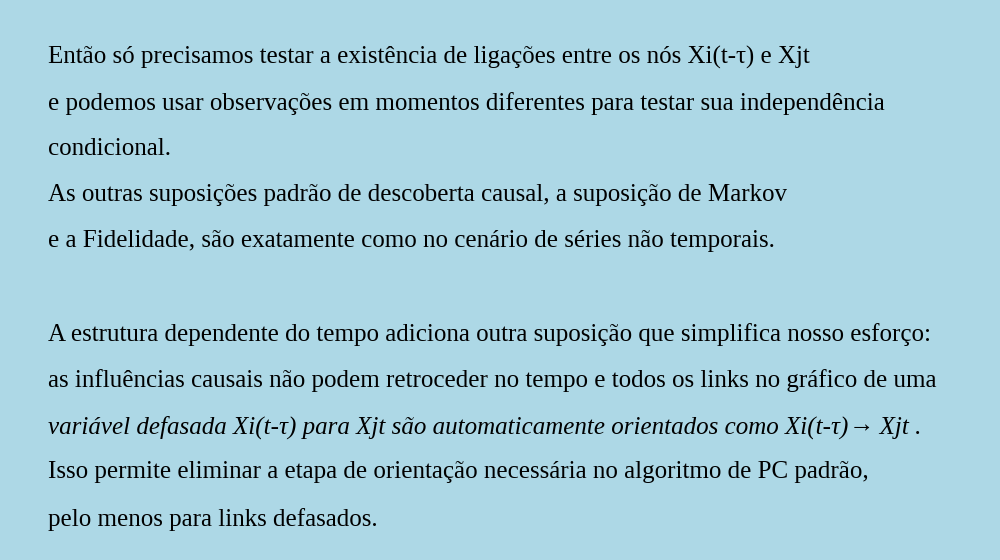

In [ ]:
slide("", [
    "Então só precisamos testar a existência de ligações entre os nós Xi(t-τ) e Xjt ",
    "e podemos usar observações em momentos diferentes para testar sua independência ",
    "condicional. ",
    "As outras suposições padrão de descoberta causal, a suposição de Markov",
    "e a Fidelidade, são exatamente como no cenário de séries não temporais.", "",
    "A estrutura dependente do tempo adiciona outra suposição que simplifica nosso esforço:",
     "as influências causais não podem retroceder no tempo e todos os links no gráfico de uma ",
    "variável defasada Xi_(t-τ) para Xj_t são automaticamente orientados como Xi_(t-τ)→ Xj_t . ",
    "Isso permite eliminar a etapa de orientação necessária no algoritmo de PC padrão, ",
    "pelo menos para links defasados."



    ], figsize=(10, 5.6)
    )

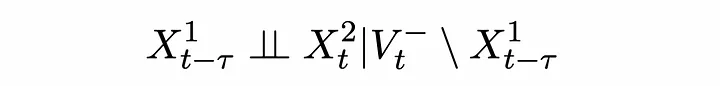

In [ ]:
url="https://miro.medium.com/v2/resize:fit:720/format:webp/1*MTZs8X_GEelhUkUWoj5wGA.png"
img(url, "CI completo:", "Para limitar a dimensionalidade, devemos assumir que todos os elos causais em P(…) têm uma defasagem finita menor ou igual a alguma defasagem máxima τ_max . Então, para testar a dependência de X1 e X2 , verificamos(acima)<br><br> V-_t inclui os intervalos de tempo t-1 até t-τ_max de X1 e X2 .<br><br> A expressão está condicionando a independência entre \( X_{t-\tau}^{1} \) e \( X_{t}^{2} \) à informação contida em \( V_{t}^{-} \) excluindo as informações específicas sobre \( X_{t-\tau}^{1} \). Em termos mais simples, estamos examinando se \( X_{t-\tau}^{1} \) e \( X_{t}^{2} \) são independentes dadas todas as outras informações disponíveis, excluindo as informações sobre \( X_{t-\tau}^{1} \).")

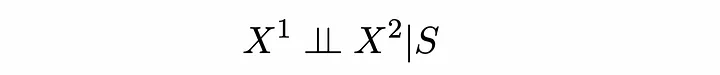

In [ ]:
img("https://miro.medium.com/v2/resize:fit:720/format:webp/1*sL5l4zp1mGvojP7B_TLjgw.png", "Outra tentativa: ", "Suponha que de alguma forma temos um conjunto de condicionamento S que contém os pais P(X2_t) de X2 e teste:(acima)<br><br> Tal teste requer suposições adicionais sobre a forma paramétrica das dependências entre as variáveis ​​envolvidas. Requer conhecer a distribuição nula sob a hipótese de independência condicional.")

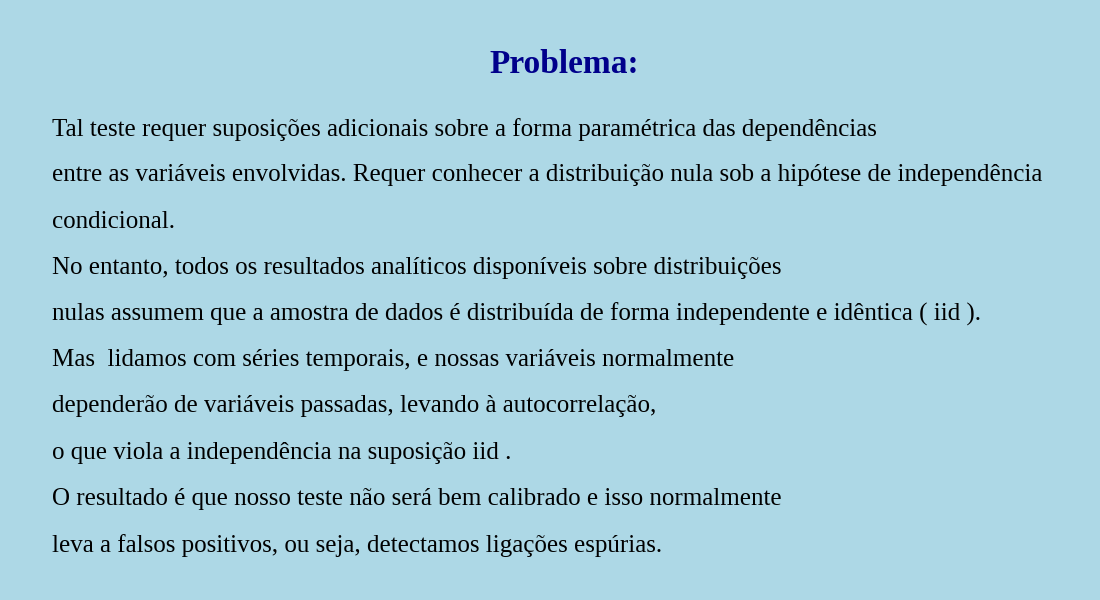

In [ ]:
slide("Problema:", ["Tal teste requer suposições adicionais sobre a forma paramétrica das dependências"          ,
 "entre as variáveis envolvidas. Requer conhecer a distribuição nula sob a hipótese de independência",
           "condicional.", "No entanto, todos os resultados analíticos disponíveis sobre distribuições ",
           "nulas assumem que a amostra de dados é distribuída de forma independente e idêntica ( iid )." ,
           "Mas  lidamos com séries temporais, e nossas variáveis normalmente" ,
           "dependerão de variáveis passadas, levando à autocorrelação,",
           "o que viola a independência na suposição iid . ",
           "O resultado é que nosso teste não será bem calibrado e isso normalmente ",
           "leva a falsos positivos, ou seja, detectamos ligações espúrias."],
            figsize= (11, 6)
      )

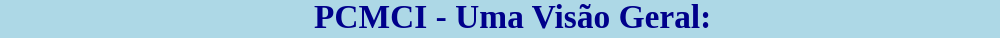

In [ ]:
slide( "PCMCI - Uma Visão Geral:", [""], text_color= "green", text_size=22, figsize=(10, 0.38),
      text= "A descoberta causal com PCMCI pode ser dividida em duas fases: <br><br>1- Seleção de condição: utiliza uma variante simplificada da fase esqueleto do algoritmo PC (PC1), para aprender um conjunto de condicionamento que contém os pais para todas as variáveis ​​Xj no sistema. "

      )


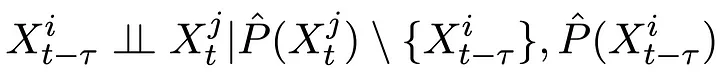

In [ ]:
url="https://miro.medium.com/v2/resize:fit:720/format:webp/1*PPaW1DP1Q1TdjrjjK8vMcg.png"
img(url,"2- Testes MCI (Independência Condicional Momentânea):", "Se esta hipótese não for rejeitada, a aresta entre Xi_t−τ e Xj_t é removida. Embora a condição em P(Xj_t) seja suficiente para condicionar conexões confusas e indiretas, o condicionamento adicional em P(Xi_t−τ ) remove os efeitos de autocorrelação de modo que os testes de independência condicional sejam bem calibrados e os falsos positivos sejam melhor controlados em o nível desejado.")

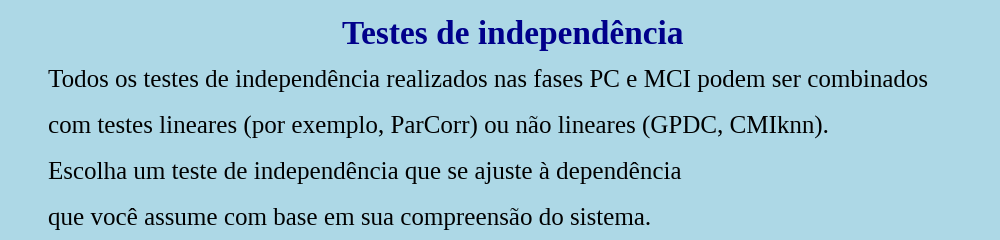

In [ ]:
slide("Testes de independência",
 ["Todos os testes de independência realizados nas fases PC e MCI podem ser combinados ",
 "com testes lineares (por exemplo, ParCorr) ou não lineares (GPDC, CMIknn). ",
 "Escolha um teste de independência que se ajuste à dependência",
  "que você assume com base em sua compreensão do sistema."],
      figsize= (10, 2.4)
      )

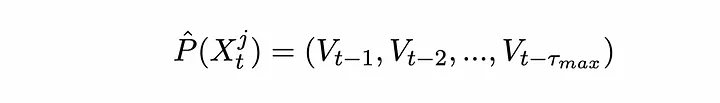

In [ ]:
img("https://miro.medium.com/v2/resize:fit:720/format:webp/1*MeZaXdsjOWb1fVIyC_2qbw.png","Fase1", "começamos inicializando todo o passado de todas as variáveis ​​Xj :<br><br>Em seguida, classificamos iterativamente quais desses nós são realmente possíveis pais de Xj <br><br>iniciamos nossa primeira iteração ( p = 0 ) testando a independência incondicional entre Xj e cada um dos possíveis pais. Se a hipótese nula, ou seja, Xj _t e Xi_t-τ são independentes, não pode ser rejeitada, removemos as respectivas variáveis ​​do nosso conjunto inicial de possíveis pais." )

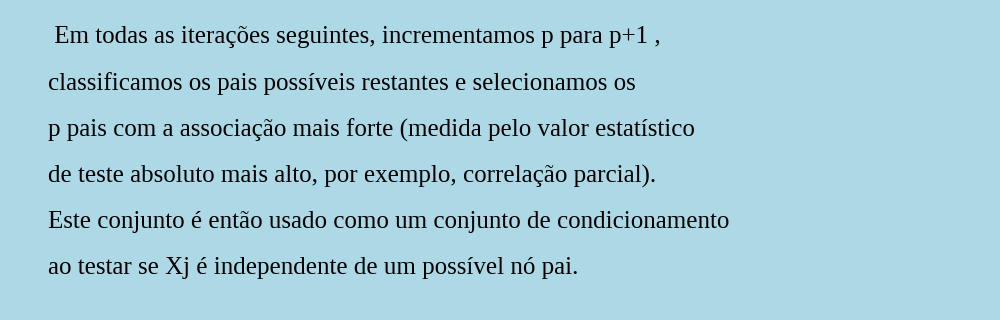

In [ ]:
slide("",
      [" Em todas as iterações seguintes, incrementamos p para p+1 ,",
      "classificamos os pais possíveis restantes e selecionamos os",
       "p pais com a associação mais forte (medida pelo valor estatístico",
      "de teste absoluto mais alto, por exemplo, correlação parcial).",
       "Este conjunto é então usado como um conjunto de condicionamento",
       "ao testar se Xj é independente de um possível nó pai. "],
      figsize=(10, 3.2)
)



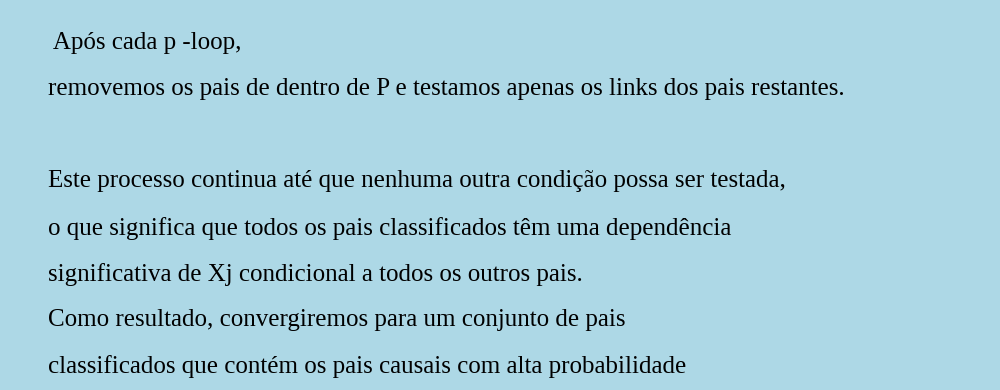

In [ ]:
slide("",
      [" Após cada p -loop,",
       "removemos os pais de dentro de P e testamos apenas os links dos pais restantes.","",

       "Este processo continua até que nenhuma outra condição possa ser testada,",
       "o que significa que todos os pais classificados têm uma dependência",
       "significativa de Xj condicional a todos os outros pais.",
       "Como resultado, convergiremos para um conjunto de pais",
       "classificados que contém os pais causais com alta probabilidade"],
      figsize=(10, 3.9)
)

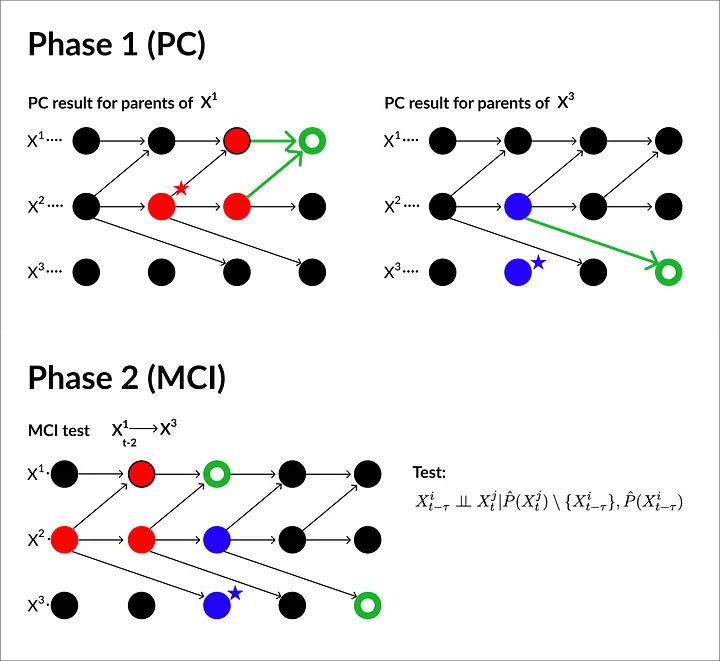

In [ ]:
img("https://miro.medium.com/v2/resize:fit:720/format:webp/1*Khosyrvs9iGVFwuIf8hbRA.png", "Visualizando: ", "No entanto, como pode ser visto na figura, ambos os conjuntos podem conter falsos positivos (marcados com uma estrela vermelha/azul), até porque o teste de independência condicional não está bem calibrado como discutido acima. Estes serão tratados na segunda fase que começa após a convergência do PC")

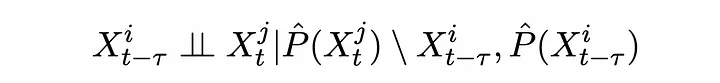

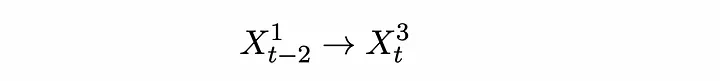

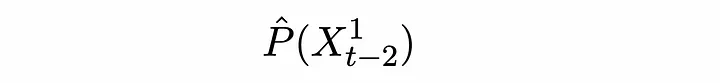

In [ ]:
img("https://miro.medium.com/v2/resize:fit:720/format:webp/1*0vOdZUhykacCYDDCn4vWcg.png", "Fase 2 :",  "testamos novamente cada um dos links possíveis para independência condicional defasada usando os conjuntos de condicionamento para ambas as variáveis <br><br>Por exemplo, queremos testar:")
img("https://miro.medium.com/v2/resize:fit:720/format:webp/1*ae9yzq-qnyLdaCOcjw7qlg.png", "", "Para fazer isso, agora simplesmente condicionamos o conjunto de condicionamento suficiente que bloqueia confusão não causal, e em")
img("https://miro.medium.com/v2/resize:fit:720/format:webp/1*1A11x9GqLK_9ZJd_yj42QQ.png", "", "para aliviar o efeito da autocorrelação. Para cada teste, agora temos um conjunto de condicionamento de dimensão inferior ao do FullCI. Se a hipótese de independência (condicional) for rejeitada, o link é adicionado à lista de links que descrevem o gráfico causal do sistema. ")

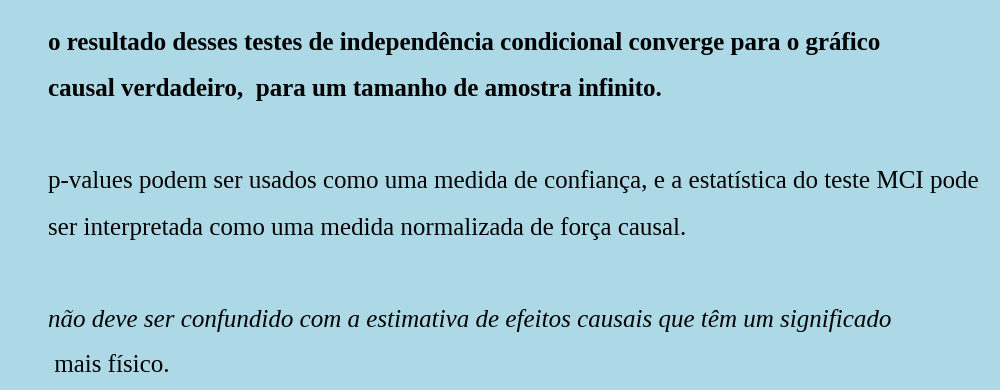

In [ ]:
slide("",
 ["*o resultado desses testes de independência condicional converge para o gráfico",
  "*causal verdadeiro,  para um tamanho de amostra infinito.",
  "",
  "p-values podem ser usados como uma medida de confiança, e a estatística do teste MCI pode",
   "ser interpretada como uma medida normalizada de força causal.",
   "",
   "_não deve ser confundido com a estimativa de efeitos causais que têm um significado",
  " mais físico. "],
     figsize=(10, 3.9)
      )

In [ ]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS
#from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb
from tigramite.independence_tests.gsquared import Gsquared
from tigramite.independence_tests.regressionCI import RegressionCI

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)  # Fixar semente aleatória para resultados reprodutíveis

def lin_f(x):
    return x  # Uma função de dependência linear

# Coeficientes de ligação
links_coeffs = {
    0: [(0, -1, 0.7), (1, -1, -0.8)],
    1: [(1, -1, 0.8), (3, -1, 0.8)],
    2: [(2, -1, 0.5), (1, -2, 0.5), (3, -3, 0.6)],
    3: [(3, -1, 0.4)]
}

# Comprimento da série temporal
T = 1000

# Gerar dados do processo causal estrutural
data = np.zeros((T, len(links_coeffs)))

# Inicializar matriz de dados
for i in range(1, T):
    for var, parents in links_coeffs.items():
        value = sum(coef * data[i + delay, parent] for parent, delay, coef in parents if i + delay >= 0)
        data[i, var] = value + np.random.normal()

# Criar DataFrame com os dados
var_names = [r'$X^0$', r'$X^1$', r'$X^2$', r'$X^3$']
datatime = pd.date_range(start='1/1/2022', periods=T)
dataframe = pd.DataFrame(data, index=datatime, columns=var_names)

print(dataframe.head(14))


               $X^0$     $X^1$     $X^2$     $X^3$
2022-01-01  0.000000  0.000000  0.000000  0.000000
2022-01-02  0.496714 -0.138264  0.647689  1.523030
2022-01-03  0.224158  0.873675  1.903057  1.376647
2022-01-04 -1.011504  2.342818  0.418979  0.084929
2022-01-05 -2.340345  0.028917 -0.164773 -0.528316
2022-01-06 -2.674206 -0.085272  1.006986 -1.623630
2022-01-07 -0.338078 -1.592898  0.636437 -2.074200
2022-01-08  0.493281 -2.822756 -1.192400 -0.453982
2022-01-09  2.002862 -2.913084 -2.968534  1.670685
2022-01-10  3.718974 -2.051630 -3.317620 -0.552570
2022-01-11  4.453449 -4.043030 -4.715927 -0.024167
2022-01-12  7.090305 -3.082389 -2.497016 -0.310770
2022-01-13  5.950602 -3.434371 -4.062203  0.932814
2022-01-14  7.256537 -3.764286 -3.262712 -0.011957


<Axes: >

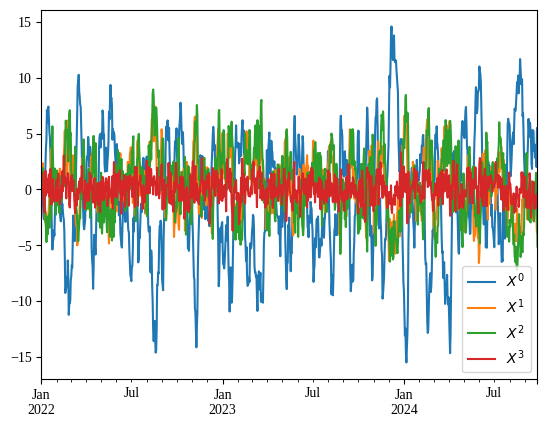

In [ ]:
dataframe.plot()

In [ ]:
import numpy as np
import pandas as pd

class CustomDataFrame(pd.DataFrame):
    @property
    def _constructor(self):
        return CustomDataFrame

    def __init__(self, *args, **kwargs):
        vector_vars = kwargs.pop('vector_vars', None)
        super().__init__(*args, **kwargs)
        self.vector_vars = vector_vars



np.random.seed(42)  # Fixar semente aleatória para resultados reprodutíveis

def lin_f(x):
    return x  # Uma função de dependência linear

# Coeficientes de ligação
links_coeffs = {
    0: [(0, -1, 0.7), (1, -1, -0.8)],
    1: [(1, -1, 0.8), (3, -1, 0.8)],
    2: [(2, -1, 0.5), (1, -2, 0.5), (3, -3, 0.6)],
    3: [(3, -1, 0.4)]
}

# Comprimento da série temporal
T = 1000

# Nomes das variáveis
var_names = [r'$X^0$', r'$X^1$', r'$X^2$', r'$X^3$']

# Gerar dados do processo causal estrutural
data = np.zeros((T, len(links_coeffs)))

# Inicializar matriz de dados
for i in range(1, T):
    for var, parents in links_coeffs.items():
        value = sum(coef * data[i + delay, parent] for parent, delay, coef in parents if i + delay >= 0)
        data[i, var] = value + np.random.normal()

# Criar DataFrame com os dados
datatime = pd.date_range(start='1/1/2022', periods=T)
dataframe = CustomDataFrame(data, index=datatime, columns=var_names, vector_vars=var_names)
dataframe.datatime = datatime


# Atribuir o atributo var_names ao DataFrame
dataframe.var_names = var_names
dataframe.N = dataframe.shape[1]


print(dataframe.head())


               $X^0$     $X^1$     $X^2$     $X^3$
2022-01-01  0.000000  0.000000  0.000000  0.000000
2022-01-02  0.496714 -0.138264  0.647689  1.523030
2022-01-03  0.224158  0.873675  1.903057  1.376647
2022-01-04 -1.011504  2.342818  0.418979  0.084929
2022-01-05 -2.340345  0.028917 -0.164773 -0.528316


In [ ]:
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe,
    cond_ind_test=parcorr,
    verbosity=1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import parcorr, gpdc, cmiknn

def dyn(x1,x2,x3,x4):
    x1 = -0.287*x2 + np.random.normal()
    x2 = 0.4*x2 + 0.287*x1+ np.random.normal()
    x3 = 0.9*x3 + np.random.normal()
    x4 = 0.9 * x2 + np.random.normal()
    return x1,x2,x3,x4


x1_ini,x2_ini,x3_ini,x4_ini = np.random.rand(4,1) #initial state
timestep = 200
data = np.expand_dims(np.concatenate((x1_ini,x2_ini,x3_ini,x4_ini ), axis=0),axis=0) #shape = [1,4]
for step in range(timestep): # run dynamics
    x1_ini,x2_ini,x3_ini,x4_ini = dyn(x1_ini,x2_ini,x3_ini,x4_ini)
    temp = np.expand_dims(np.concatenate((x1_ini,x2_ini,x3_ini,x4_ini), axis=0),axis=0)
    data = np.concatenate((data, temp), axis=0)
print(data.shape) #shape = [timestep+1,4]
var_names = ['x1', 'x2', 'x3', 'x4']
dataframe = pp.DataFrame(data,
                         datatime=np.arange(len(data)),
                         var_names=var_names)

(201, 4)


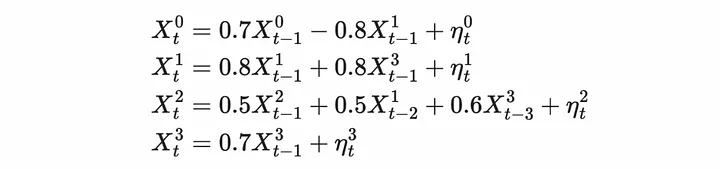

In [ ]:
img("https://miro.medium.com/v2/resize:fit:720/format:webp/1*-RpQUSTNgUgi72Rd0-PsSA.png", "","")

In [ ]:
#@title Granger
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

def dyn(x0, x1, x2, x3, history):
    eta = np.random.normal(size=4)
    x0_new = 0.7 * history[0][0] - 0.8 * history[1][1] + eta[0]
    x1_new = 0.8 * history[0][1] + 0.8 * history[0][3] + eta[1]
    x2_new = 0.5 * history[0][2] + 0.5 * history[1][1] + 0.6 * history[2][3] + eta[2]
    x3_new = 0.7 * history[0][3] + eta[3]
    return x0_new, x1_new, x2_new, x3_new

# Initial state
x0_ini, x1_ini, x2_ini, x3_ini = np.random.rand(4)
history = np.zeros((3, 4))
history[0] = [x0_ini, x1_ini, x2_ini, x3_ini]

timestep = 200
data = np.array([[x0_ini, x1_ini, x2_ini, x3_ini]])

for step in range(1, timestep + 1):  # run dynamics
    x0_ini, x1_ini, x2_ini, x3_ini = dyn(x0_ini, x1_ini, x2_ini, x3_ini, history)
    history = np.roll(history, shift=1, axis=0)
    history[0] = [x0_ini, x1_ini, x2_ini, x3_ini]
    data = np.vstack((data, [x0_ini, x1_ini, x2_ini, x3_ini]))

print(data.shape)  # shape = [timestep+1, 4]

# Convert data to DataFrame
var_names = ['x0', 'x1', 'x2', 'x3']
df = pd.DataFrame(data, columns=var_names)

# Perform Granger causality tests
max_lag = 2
results = {}

for col_x in var_names:
    for col_y in var_names:
        if col_x != col_y:
            test_result = grangercausalitytests(df[[col_y, col_x]], max_lag, verbose=False)
            p_values = [round(test_result[i+1][0]['ssr_chi2test'][1], 4) for i in range(max_lag)]
            results[(col_x, col_y)] = p_values
            print(f'Granger Causality test results for {col_x} causing {col_y}: {p_values}')

# Display results in a readable format
results_df = pd.DataFrame(results, index=[f'lag {i+1}' for i in range(max_lag)])
print("\nGranger Causality Test Results (p-values):")
print(results_df)


(201, 4)
Granger Causality test results for x0 causing x1: [0.0656, 0.8534]
Granger Causality test results for x0 causing x2: [0.8821, 0.0028]
Granger Causality test results for x0 causing x3: [0.7621, 0.0705]
Granger Causality test results for x1 causing x0: [0.0, 0.0]
Granger Causality test results for x1 causing x2: [0.0, 0.0]
Granger Causality test results for x1 causing x3: [0.9412, 0.4111]
Granger Causality test results for x2 causing x0: [0.0, 0.0]
Granger Causality test results for x2 causing x1: [0.0099, 0.3469]
Granger Causality test results for x2 causing x3: [0.9775, 0.4665]
Granger Causality test results for x3 causing x0: [0.0004, 0.0]
Granger Causality test results for x3 causing x1: [0.0, 0.0]
Granger Causality test results for x3 causing x2: [0.0, 0.0]

Granger Causality Test Results (p-values):
           x0                   x1                x2                      x3  \
           x1      x2      x3   x0   x2      x3   x0      x1      x3      x0   
lag 1  0.0656  0

(201, 4)


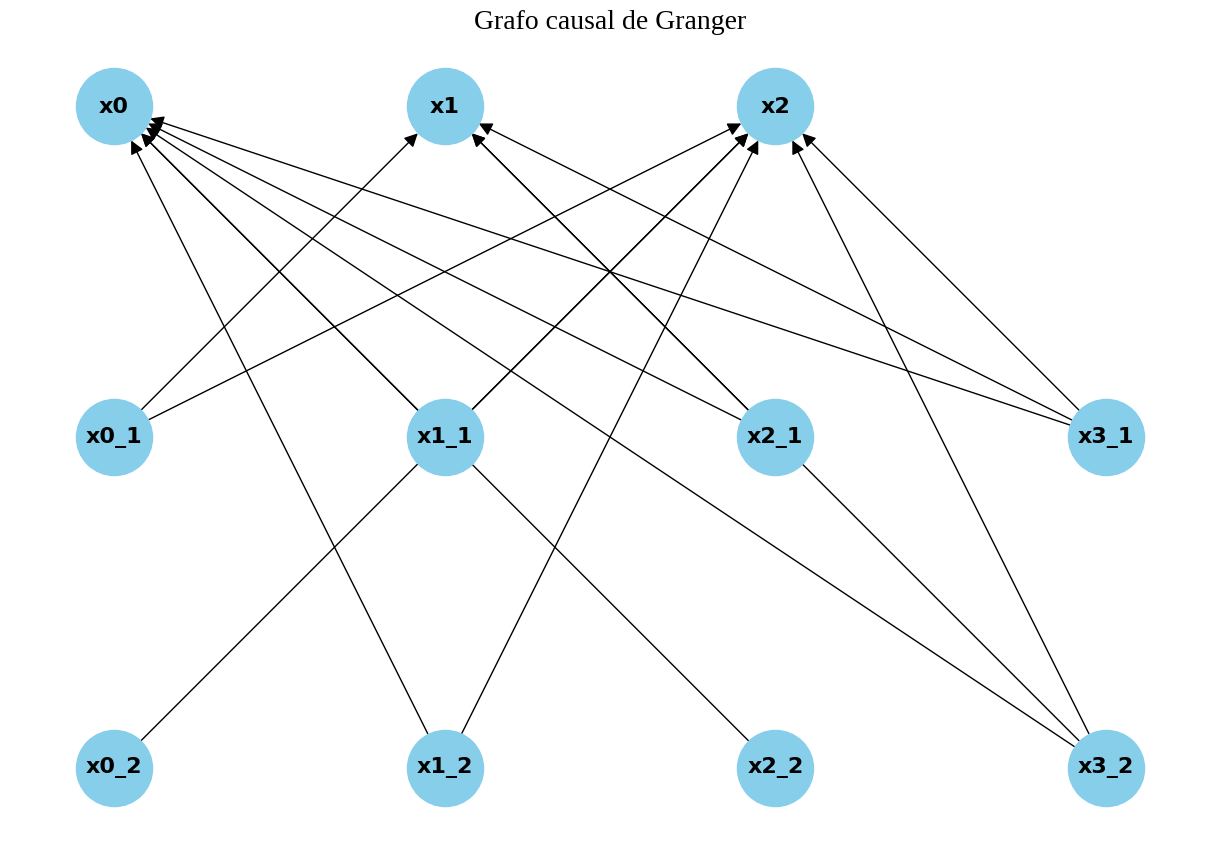

In [ ]:
#@title Grafo Granger
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
import networkx as nx

def dyn(x0, x1, x2, x3, history):
    eta = np.random.normal(size=4)
    x0_new = 0.7 * history[0][0] - 0.8 * history[1][1] + eta[0]
    x1_new = 0.8 * history[0][1] + 0.8 * history[0][3] + eta[1]
    x2_new = 0.5 * history[0][2] + 0.5 * history[1][1] + 0.6 * history[2][3] + eta[2]
    x3_new = 0.7 * history[0][3] + eta[3]
    return x0_new, x1_new, x2_new, x3_new

# Initial state
x0_ini, x1_ini, x2_ini, x3_ini = np.random.rand(4)
history = np.zeros((3, 4))
history[0] = [x0_ini, x1_ini, x2_ini, x3_ini]

timestep = 200
data = np.array([[x0_ini, x1_ini, x2_ini, x3_ini]])

for step in range(1, timestep + 1):  # run dynamics
    x0_ini, x1_ini, x2_ini, x3_ini = dyn(x0_ini, x1_ini, x2_ini, x3_ini, history)
    history = np.roll(history, shift=1, axis=0)
    history[0] = [x0_ini, x1_ini, x2_ini, x3_ini]
    data = np.vstack((data, [x0_ini, x1_ini, x2_ini, x3_ini]))

print(data.shape)  # shape = [timestep+1, 4]

# Convert data to DataFrame
var_names = ['x0', 'x1', 'x2', 'x3']
df = pd.DataFrame(data, columns=var_names)

# Perform Granger causality tests
max_lag = 2
results = {}

for col_x in var_names:
    for col_y in var_names:
        test_result = grangercausalitytests(df[[col_y, col_x]], max_lag, verbose=False)
        for lag in range(1, max_lag + 1):
            p_value = test_result[lag][0]['ssr_chi2test'][1]
            results[(col_x, col_y, lag)] = p_value

# Define significance level
significance_level = 0.05

# Create causal graph
G = nx.DiGraph()

for (col_x, col_y, lag), p_value in results.items():
    if p_value < significance_level:
        G.add_edge(f"{col_x}_{lag}", col_y)

# Generate positions for the nodes in a grid layout
positions = {}
node_list = list(G.nodes())
var_indices = {var: i for i, var in enumerate(var_names)}

for node in node_list:
    if "_" in node:
        var, lag = node.split('_')
        positions[node] = (var_indices[var], -int(lag))
    else:
        var = node
        positions[node] = (var_indices[var], 0)

# Plot the causal graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos=positions, with_labels=True, node_size=3000, node_color="skyblue", font_size=16, font_weight="bold", arrowsize=20)
plt.title("Grafo causal de Granger", fontsize=20)
plt.show()


In [ ]:
#@title Inicializando
#@markdown aqui simulamos os dados como nas fórmulas dadas pelo blog
import numpy as np
import matplotlib.pyplot as plt
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import parcorr, gpdc, cmiknn
tau_max = 5  # ajustando para levar em conta até o terceiro lag
timestep = 2000

def dyn(x0, x1, x2, x3, history):
    eta = np.random.normal(size=4)
    x0_new = 0.7 * history[0][0] - 0.8 * history[1][1] + eta[0]
    x1_new = 0.8 * history[0][1] + 0.8 * history[0][3] + eta[1]
    x2_new = 0.5 * history[0][2] + 0.5 * history[1][1] + 0.6 * history[2][3] + eta[2]
    x3_new = 0.7 * history[0][3] + eta[3]
    return x0_new, x1_new, x2_new, x3_new

# Initial state
x0_ini, x1_ini, x2_ini, x3_ini = np.random.rand(4)
history = np.zeros((3, 4))
history[0] = [x0_ini, x1_ini, x2_ini, x3_ini]


data = np.array([[x0_ini, x1_ini, x2_ini, x3_ini]])

for step in range(1, timestep + 1):  # run dynamics
    x0_ini, x1_ini, x2_ini, x3_ini = dyn(x0_ini, x1_ini, x2_ini, x3_ini, history)
    history = np.roll(history, shift=1, axis=0)
    history[0] = [x0_ini, x1_ini, x2_ini, x3_ini]
    data = np.vstack((data, [x0_ini, x1_ini, x2_ini, x3_ini]))

print(data.shape)  # shape = [timestep+1, 4]

var_names = ['x0', 'x1', 'x2', 'x3']
dataframe = pp.DataFrame(data, datatime=np.arange(len(data)), var_names=var_names)



(2001, 4)


(<Figure size 640x480 with 4 Axes>,
 array([<Axes: ylabel='x0'>, <Axes: ylabel='x1'>, <Axes: ylabel='x2'>,
        <Axes: ylabel='x3'>], dtype=object))

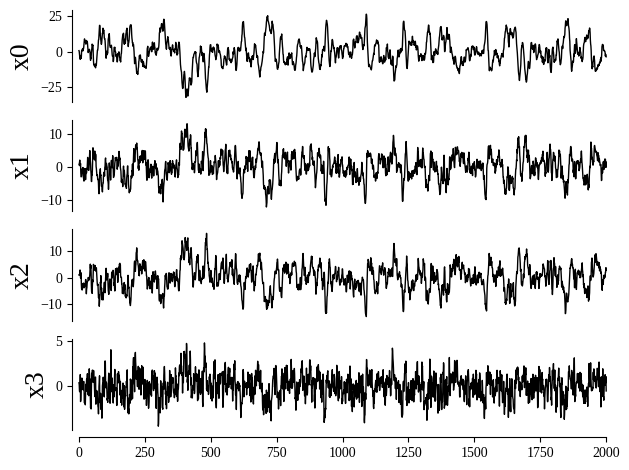

In [ ]:
tp.plot_timeseries(dataframe,label_fontsize=20,tick_label_size=10)

In [ ]:
#@markdown Assumindo que nossa causa e efeitos são linearmente dependentes usaremos o teste de correlação parcial especificado com significância='analítica' que assume que a distribuição nula é t de Student
ParCorr = parcorr.ParCorr(significance='analytic')

# Configurar e executar PCMCI
pcmci = PCMCI(
    dataframe=dataframe,
    cond_ind_test=ParCorr,
    verbosity=1
)



##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 20


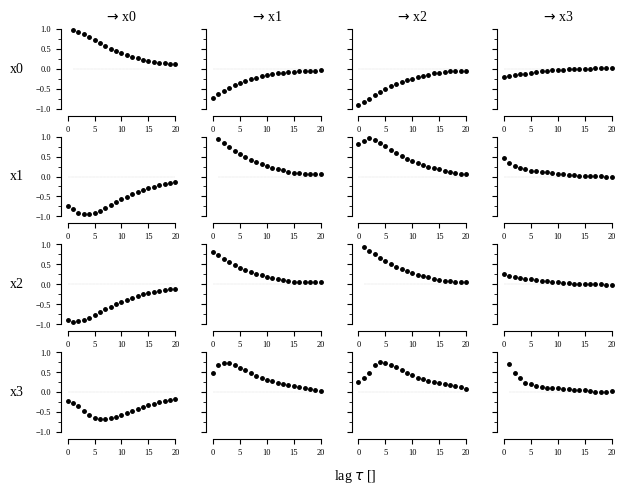

In [ ]:
#@title Aqui ajustamos o parâmetro lag a partir das autocovariâncias
#@markdown A próxima decisão que precisamos tomar é escolher o intervalo de tempo máximo tau_max no qual esperamos o nexo causal mais longo possível. No caso plotamos as correlacoes até 20, e nesse caso em particular 8 parece ser razoável
correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names,
                                  'x_base':5, 'y_base':.5})


In [ ]:
#@title Agora obtemos os resultados, e plotamos o grafo básico
# Teste de independência (ParCorr)

tau_max=8    ## apesar de recomendar 8, coloco 3 pra ficar mais visível na apresentação


ParCorr = parcorr.ParCorr(significance='analytic')

# Configurar e executar PCMCI
pcmci = PCMCI(
    dataframe=dataframe,
    cond_ind_test=ParCorr,
    verbosity=1
)

pcmci.verbosity = 1

results = pcmci.run_pcmci(tau_min=1, tau_max=tau_max, pc_alpha=None)
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'],tau_min= 1, tau_max=tau_max, fdr_method='fdr_bh')





##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 8
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable x0 has 4 link(s):
    [pc_alpha = 0.3]
        (x0 -1): max_pval = 0.00000, |min_val| =  0.846
        (x1 -2): max_pval = 0.00000, |min_val| =  0.665
        (x3 -5): max_pval = 0.06431, |min_val| =  0.042
        (x2 -6): max_pval = 0.28093, |min_val| =  0.024

    Variable x1 has 5 link(s):
    [pc_alpha = 0.4]
        (x1 -1): max_pval = 0.00000, |min_val| =  0.755
        (x3 -1): max_pval = 0.00000, |min_val| =  0.640
        (x3 -4): max_pval = 0.23663, |min_val| =  0.027
        (x3 -6): max_pval = 0.31019, |min_val| =  0.023
        (x3 -8): max_pval = 0.37985, |min_val| =  0.020

    Variable x2 has 6 link(s):
    [pc_alpha = 0.4]
        (x2 -1): max_pval = 0.00000, |min_val| =  0.482
        (x1 -2): max_pv

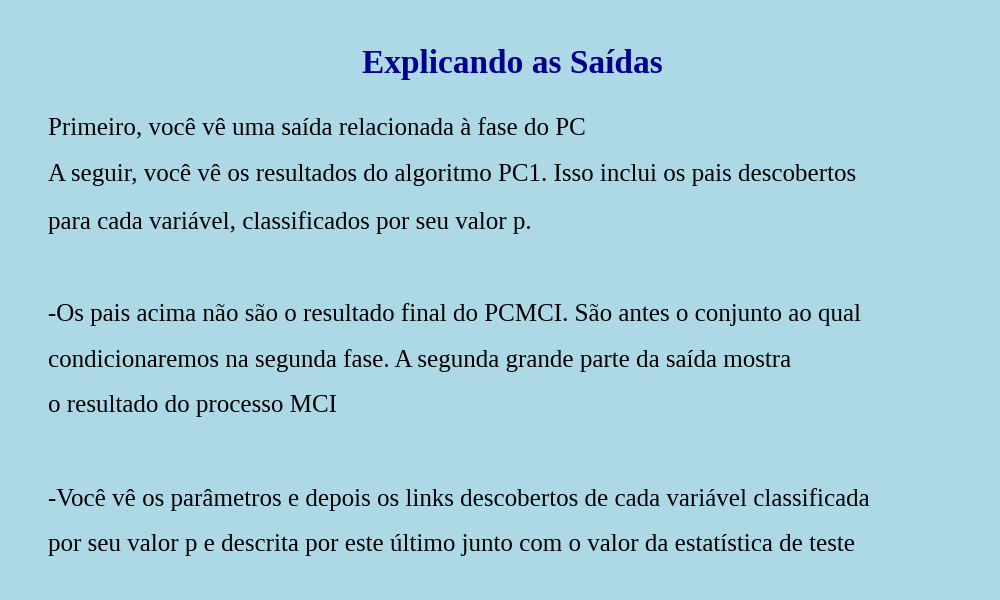

In [ ]:
#@title Saídas
slide("Explicando as Saídas", [
           "Primeiro, você vê uma saída relacionada à fase do PC",
          "A seguir, você vê os resultados do algoritmo PC1. Isso inclui os pais descobertos",
           "para cada variável, classificados por seu valor p.",
           " ",
           "-Os pais acima não são o resultado final do PCMCI. São antes o conjunto ao qual",
           "condicionaremos na segunda fase. A segunda grande parte da saída mostra",
           "o resultado do processo MCI",
           "",
           "-Você vê os parâmetros e depois os links descobertos de cada variável classificada",
           "por seu valor p e descrita por este último junto com o valor da estatística de teste"

           ])

In [ ]:
#@title P-valores
#@markdown O valor da estatística de teste (val) pode ser um bom indicador da força causal.
print("p-values")
print (results['p_matrix'].round(3))
print("MCI partial correlations")
print (results['val_matrix'].round(2))

p-values
[[[1.    0.    0.203 0.847 0.847 0.123 0.75  0.379 0.474]
  [1.    0.143 0.515 0.916 0.289 0.982 0.446 0.157 0.401]
  [1.    0.661 0.929 0.923 0.562 0.68  0.69  0.41  0.903]
  [1.    0.832 0.603 0.623 0.201 0.173 0.148 0.335 0.618]]

 [[1.    0.417 0.    0.241 0.041 0.984 0.658 0.042 0.589]
  [1.    0.    0.898 0.176 0.524 0.46  0.745 0.936 0.51 ]
  [1.    0.467 0.    0.552 0.516 0.187 0.321 0.772 0.752]
  [1.    0.308 0.385 0.055 0.709 0.196 0.666 0.174 0.655]]

 [[1.    0.192 0.309 0.973 0.732 0.311 0.237 0.462 0.822]
  [1.    0.995 0.641 0.512 0.931 0.812 0.212 0.763 0.316]
  [1.    0.    0.288 0.72  0.923 0.243 0.083 0.84  0.841]
  [1.    0.256 0.014 0.566 0.563 0.714 0.768 0.81  0.941]]

 [[1.    0.932 0.787 0.965 0.291 0.07  0.945 0.554 0.653]
  [1.    0.    0.699 0.253 0.277 0.828 0.169 0.975 0.104]
  [1.    0.42  0.161 0.    0.964 0.81  0.887 0.696 0.161]
  [1.    0.    0.722 0.579 0.36  0.866 0.188 0.527 0.23 ]]]
MCI partial correlations
[[[ 0.    0.55 -0.03 -0.   -0.

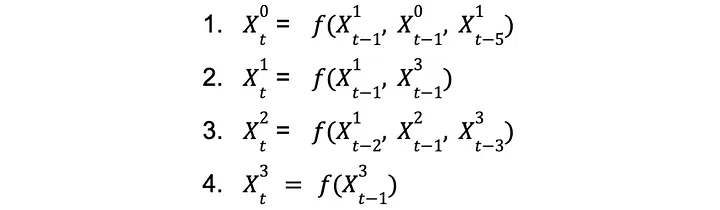

In [ ]:
img("https://miro.medium.com/v2/resize:fit:720/format:webp/1*0AoHadDvdKzDutqYboD9Zg.png", "Links descobertos no artigo", "Erro: X(1)_(t-5). falso positivo aqui<br><br>Se reduzir a sigificância para 1%, o erro some" )

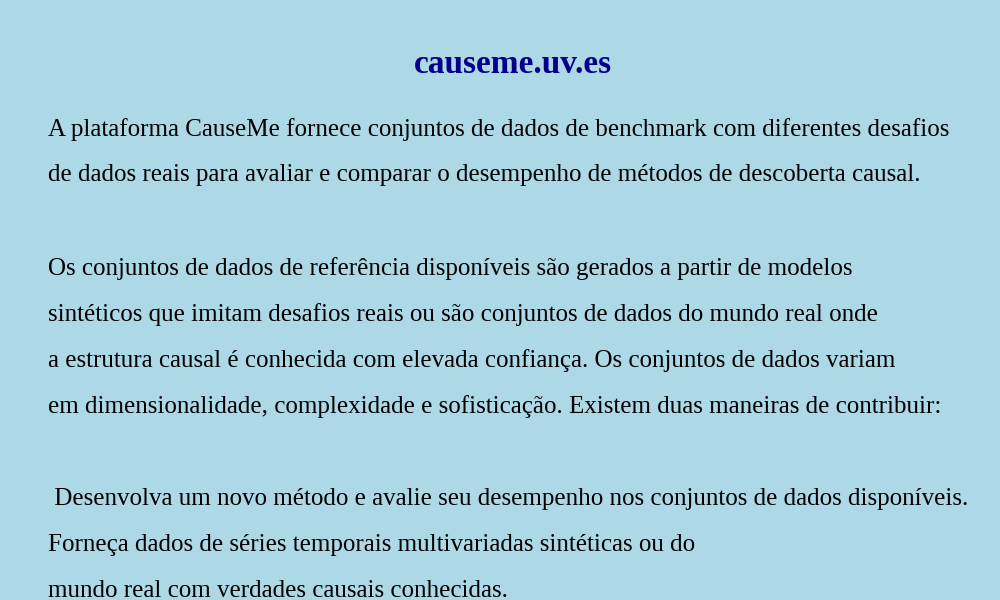

In [ ]:
#@title Causeme
slide("causeme.uv.es",
 [
     "A plataforma CauseMe fornece conjuntos de dados de benchmark com diferentes desafios",
     "de dados reais para avaliar e comparar o desempenho de métodos de descoberta causal.","",
     "Os conjuntos de dados de referência disponíveis são gerados a partir de modelos",
     "sintéticos que imitam desafios reais ou são conjuntos de dados do mundo real onde",
     "a estrutura causal é conhecida com elevada confiança. Os conjuntos de dados variam",
      "em dimensionalidade, complexidade e sofisticação. Existem duas maneiras de contribuir:", "",
      " Desenvolva um novo método e avalie seu desempenho nos conjuntos de dados disponíveis.",
     "Forneça dados de séries temporais multivariadas sintéticas ou do ",
     "mundo real com verdades causais conhecidas."
     ]

      )

(<Figure size 400x400 with 1 Axes>, <Axes: >)

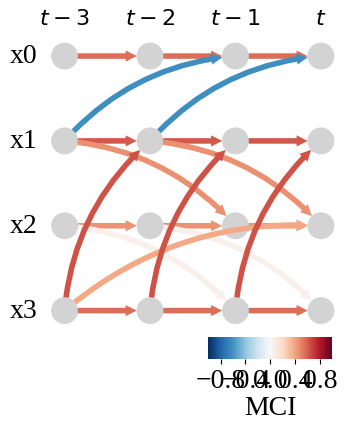

In [ ]:
#@title grafo (limitando a lag=3)
tau_max=3
results = pcmci.run_pcmci(tau_min=1, tau_max=tau_max, pc_alpha=None)
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'],tau_min= 1, tau_max=tau_max, fdr_method='fdr_bh')
clear_output()
tp.plot_time_series_graph(
    figsize=(4, 4),
    val_matrix=results['val_matrix'],
    graph = results['graph'],
    var_names=var_names,
    link_colorbar_label='MCI',
    label_fontsize=20,
    tick_label_size=20
)

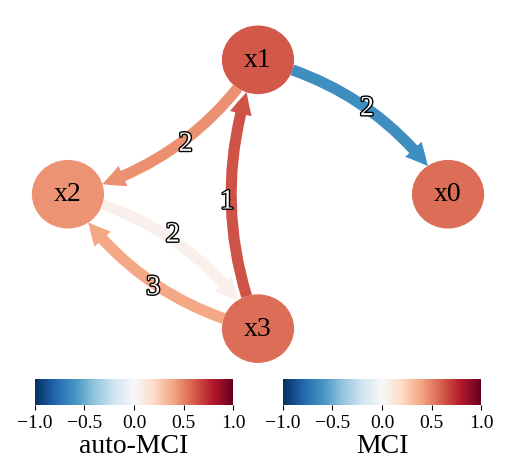

In [ ]:
# Plotar gráfico
tp.plot_graph(graph=results['graph'],
              val_matrix=results['val_matrix'],
              var_names=var_names,
              link_colorbar_label='MCI',
              node_colorbar_label='auto-MCI',
              link_label_fontsize=20,
              label_fontsize=20,
              tick_label_size=14,
              node_label_size=20,
              edge_ticks=0.5,
              node_ticks=0.5,
              node_size=0.5)

plt.show()


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 2
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable AN has 4 link(s):
    [pc_alpha = 0.05]
        (AN -1): max_pval = 0.00000, |min_val| =  0.774
        (AN -2): max_pval = 0.00000, |min_val| =  0.301
        (ON -1): max_pval = 0.00000, |min_val| =  0.083
        (BN -1): max_pval = 0.01355, |min_val| =  0.043

    Variable ON has 5 link(s):
    [pc_alpha = 0.4]
        (ON -1): max_pval = 0.00000, |min_val| =  0.753
        (ON -2): max_pval = 0.00000, |min_val| =  0.250
        (BN -1): max_pval = 0.00298, |min_val| =  0.052
        (AN -1): max_pval = 0.01302, |min_val| =  0.044
        (BN -2): max_pval = 0.35295, |min_val| =  0.016

    Variable BN has 5 link(s):
    [pc_alpha = 0.3]
        (BN -1): max_pval = 0.00000, |min_val| =  0.679
        (ON -1): max_p

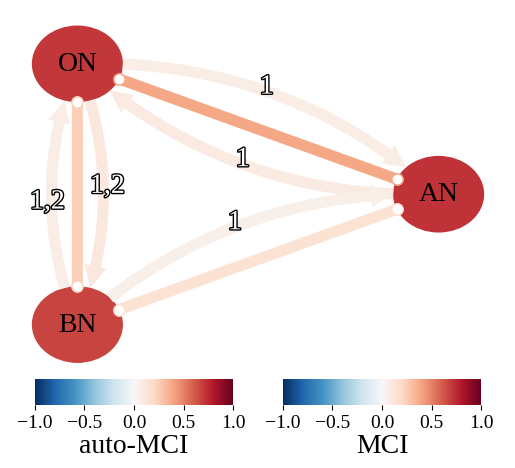

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tigramite import data_processing as pp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import parcorr
from tigramite import plotting as tp

# Carregar dados do arquivo Excel
data = pd.read_excel('/content/Doadores.xls')

# Selecionar apenas as colunas de interesse: AN, ON, BN
data = data[['AN', 'ON', 'BN']]

# Calcular médias móveis de 7 dias
data = data.rolling(window=7).mean()

# Remover as primeiras 6 linhas que contêm NaNs devido ao cálculo das médias móveis
data = data.dropna()

# Variáveis de interesse
var_names = data.columns.tolist()

# Configurar DataFrame
dataframe = pp.DataFrame(data.values, var_names=var_names)

# Teste de independência (ParCorr)
ParCorr = parcorr.ParCorr(significance='analytic')

# Configurar e executar PCMCI
pcmci = PCMCI(
    dataframe=dataframe,
    cond_ind_test=ParCorr,
    verbosity=1
)

pcmci.verbosity = 1
tau_max = 2
results = pcmci.run_pcmci(tau_max=tau_max, pc_alpha=None)
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], tau_max=tau_max, fdr_method='fdr_bh')

# Plotar gráfico
tp.plot_graph(graph=results['graph'],
              val_matrix=results['val_matrix'],
              var_names=var_names,
              link_colorbar_label='MCI',
              node_colorbar_label='auto-MCI',
              link_label_fontsize=20,
              label_fontsize=20,
              tick_label_size=14,
              node_label_size=20,
              edge_ticks=0.5,
              node_ticks=0.5,
              node_size=0.5)

plt.show()



##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 2
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable AN has 4 link(s):
    [pc_alpha = 0.05]
        (AN -1): max_pval = 0.00000, |min_val| =  0.774
        (AN -2): max_pval = 0.00000, |min_val| =  0.301
        (ON -1): max_pval = 0.00000, |min_val| =  0.083
        (BN -1): max_pval = 0.01355, |min_val| =  0.043

    Variable ON has 5 link(s):
    [pc_alpha = 0.4]
        (ON -1): max_pval = 0.00000, |min_val| =  0.753
        (ON -2): max_pval = 0.00000, |min_val| =  0.250
        (BN -1): max_pval = 0.00298, |min_val| =  0.052
        (AN -1): max_pval = 0.01302, |min_val| =  0.044
        (BN -2): max_pval = 0.35295, |min_val| =  0.016

    Variable BN has 5 link(s):
    [pc_alpha = 0.3]
        (BN -1): max_pval = 0.00000, |min_val| =  0.679
        (ON -1): max_p

(<Figure size 640x480 with 1 Axes>, <Axes: >)

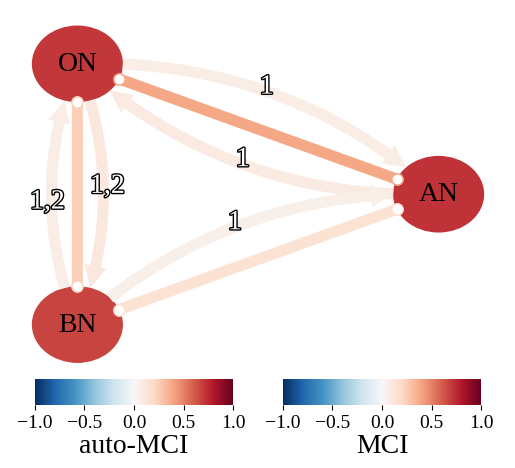

In [ ]:
ParCorr = parcorr.ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe,
    cond_ind_test=ParCorr,
    verbosity=1)

pcmci.verbosity = 1
tau_max=2
results = pcmci.run_pcmci(tau_max=tau_max, pc_alpha=None)
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], tau_max=tau_max, fdr_method='fdr_bh')

tp.plot_graph(graph = results['graph'],
    val_matrix=results['val_matrix'],
    var_names=var_names,
    link_colorbar_label='MCI',
    node_colorbar_label='auto-MCI',
    link_label_fontsize=20,
    label_fontsize=20,
    tick_label_size=14,
    node_label_size=20,
    edge_ticks=0.5,
    node_ticks=0.5,
    node_size=0.5
    )

(<Figure size 640x480 with 3 Axes>,
 array([<Axes: ylabel='AN'>, <Axes: ylabel='ON'>, <Axes: ylabel='BN'>],
       dtype=object))

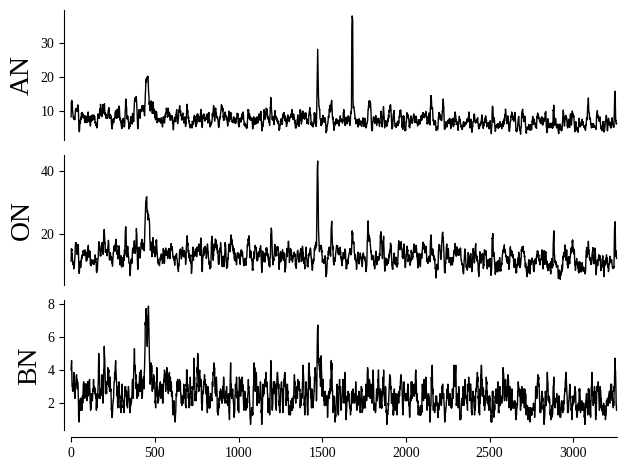

In [ ]:
tp.plot_timeseries(dataframe,label_fontsize=20,tick_label_size=10)

(<Figure size 400x400 with 1 Axes>, <Axes: >)

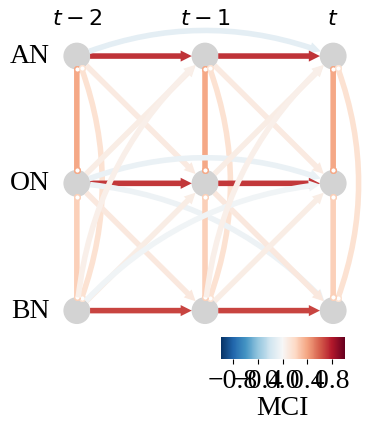

In [ ]:
tp.plot_time_series_graph(
    figsize=(4, 4),
    val_matrix=results['val_matrix'],
    graph = results['graph'],
    var_names=var_names,
    link_colorbar_label='MCI',
    label_fontsize=20,
    tick_label_size=20
)

**Definição 2.5 (Causalidade de Granger)**. A série \(X\) é Granger não causal para a série \(Y\) com relação a \(V=(X, Y, Z)\) se \(Y_{t+1} \bot X^{t-1} \mid Y^{t-1}, Z^{t-1}\) para todo \(t \in \mathbb{Z}\); caso contrário, dizemos que \(X\) causa Granger em \(Y\) com relação a \(V\).


[*********************100%%**********************]  3 of 3 completed



##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 2
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable AAPL has 4 link(s):
    [pc_alpha = 0.05]
        (AAPL -1): max_pval = 0.00000, |min_val| =  0.922
        (AAPL -2): max_pval = 0.00000, |min_val| =  0.726
        (MSFT -1): max_pval = 0.01885, |min_val| =  0.074
        (MSFT -2): max_pval = 0.03094, |min_val| =  0.068

    Variable AMZN has 6 link(s):
    [pc_alpha = 0.5]
        (AMZN -1): max_pval = 0.00000, |min_val| =  0.931
        (AMZN -2): max_pval = 0.00000, |min_val| =  0.762
        (AAPL -1): max_pval = 0.13021, |min_val| =  0.048
        (AAPL -2): max_pval = 0.14258, |min_val| =  0.047
        (MSFT -2): max_pval = 0.45396, |min_val| =  0.024
        (MSFT -1): max_pval = 0.45587, |min_val| =  0.024

    Variable MSFT has 2 link(s):
    [pc_alpha = 0

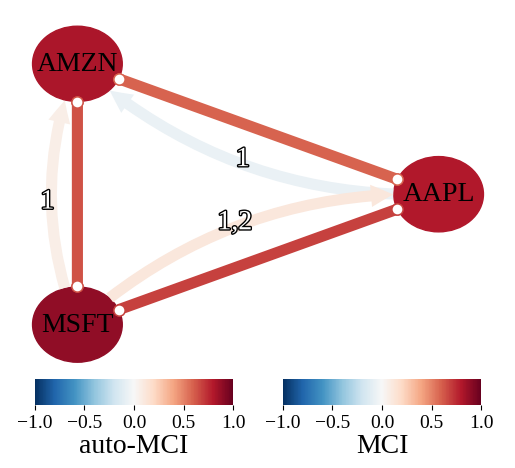

(<Figure size 400x400 with 1 Axes>, <Axes: >)

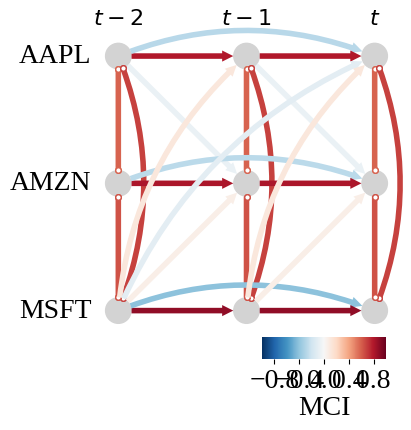

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from tigramite import data_processing as pp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import parcorr
from tigramite import plotting as tp

# Baixar dados das ações da NASDAQ
tickers = ['AAPL', 'MSFT', 'AMZN']
data = yf.download(tickers, start='2020-01-01', end='2024-01-01')['Adj Close']

# Calcular médias móveis de 7 dias
data = data.rolling(window=7).mean()

# Remover as primeiras 6 linhas que contêm NaNs devido ao cálculo das médias móveis
data = data.dropna()

# Variáveis de interesse
var_names = data.columns.tolist()

# Configurar DataFrame
dataframe = pp.DataFrame(data.values, var_names=var_names)

# Teste de independência (ParCorr)
ParCorr = parcorr.ParCorr(significance='analytic')

# Configurar e executar PCMCI
pcmci = PCMCI(
    dataframe=dataframe,
    cond_ind_test=ParCorr,
    verbosity=1
)

pcmci.verbosity = 1
tau_max = 2
results = pcmci.run_pcmci(tau_max=tau_max, pc_alpha=None)
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], tau_max=tau_max, fdr_method='fdr_bh')

# Plotar gráfico
tp.plot_graph(graph=results['graph'],
              val_matrix=results['val_matrix'],
              var_names=var_names,
              link_colorbar_label='MCI',
              node_colorbar_label='auto-MCI',
              link_label_fontsize=20,
              label_fontsize=20,
              tick_label_size=14,
              node_label_size=20,
              edge_ticks=0.5,
              node_ticks=0.5,
              node_size=0.5)

plt.show()


tp.plot_time_series_graph(
    figsize=(4, 4),
    val_matrix=results['val_matrix'],
    graph = results['graph'],
    var_names=var_names,
    link_colorbar_label='MCI',
    label_fontsize=20,
    tick_label_size=20
)

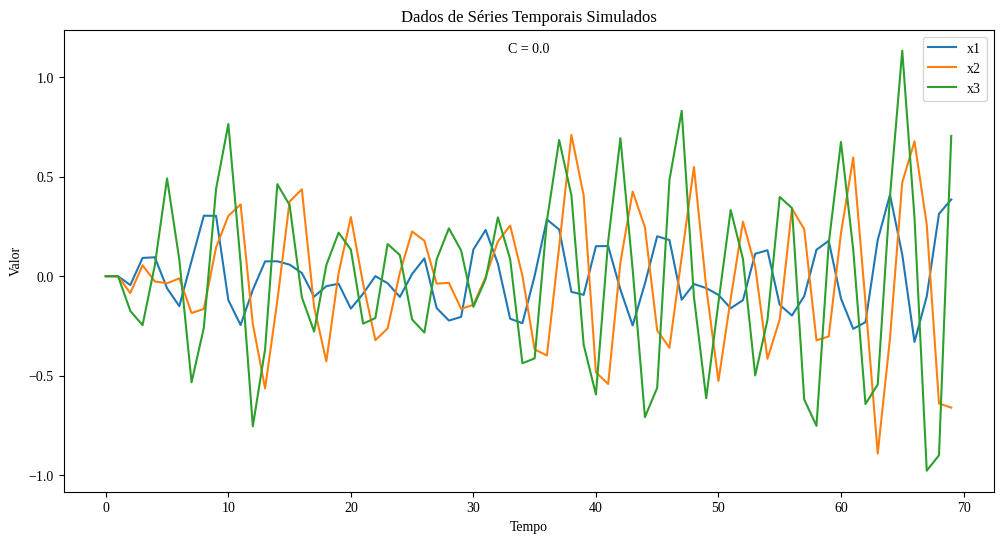

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

T = 70
C = 0.

e = np.random.normal(loc=0, scale=0.1, size=(T, 3))
x = np.zeros((T, 3))

for t in range(2, T):
    x[t, 0] = 0.5 * x[t-1, 0] - 0.8 * x[t-2, 0] + e[t, 0]
    x[t, 1] = 0.5 * x[t-1, 1] - 0.8 * x[t-2, 1] + C * x[t-1, 0] + (0.7 - C) * x[t-2, 0] + e[t, 1]
    x[t, 2] = 0.5 * x[t-1, 2] - 0.8 * x[t-2, 2] + (0.7 - C) * x[t-1, 0] + C * x[t-2, 0] + e[t, 2]

df = pd.DataFrame(x, columns=['x1', 'x2', 'x3'])

plt.figure(figsize=(12, 6))
plt.plot(df)
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.title('Dados de Séries Temporais Simulados')
plt.legend(['x1', 'x2', 'x3'])

plt.text(0.5, 0.95, 'C = {}'.format(C), transform=plt.gca().transAxes, ha='center')
plt.show()

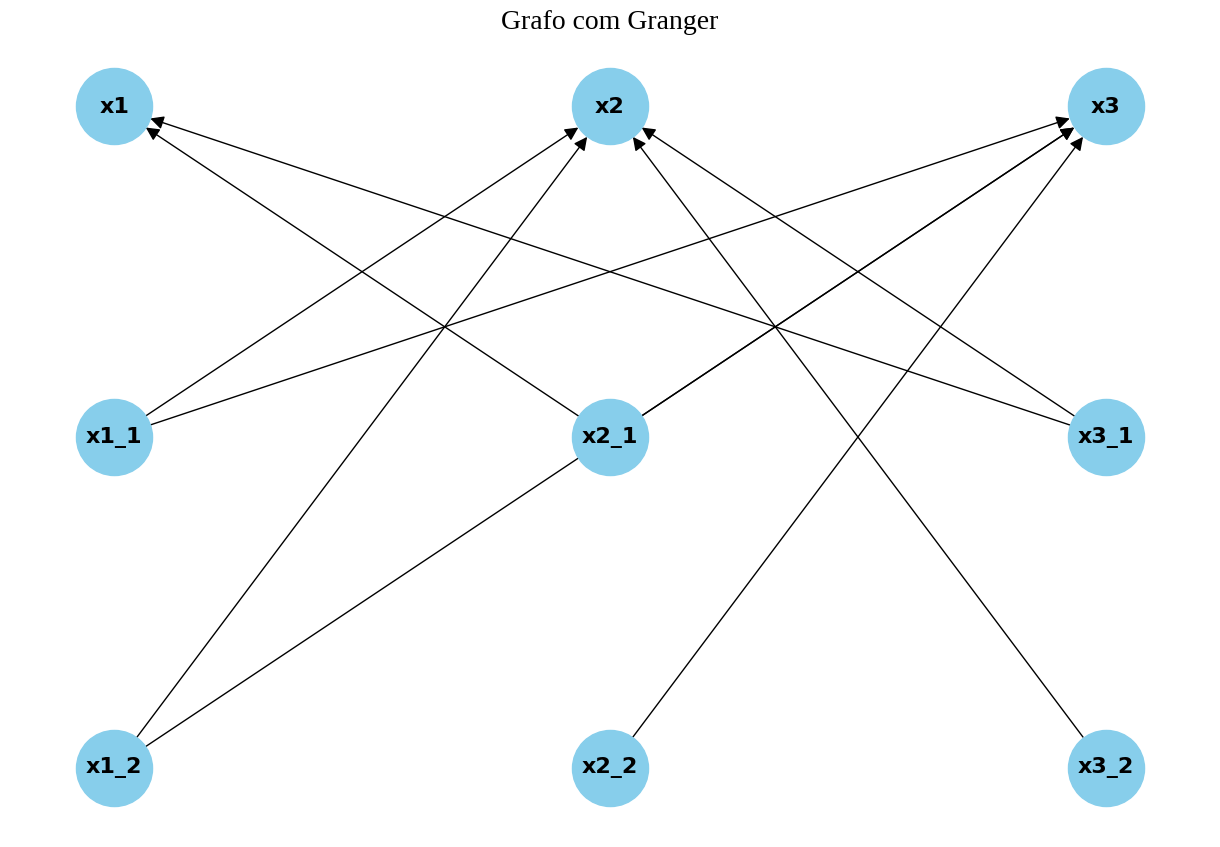

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
import networkx as nx

# Parâmetros
T = 200  # Tamanho da série temporal
C = 0.0  # Parâmetro C

# Gerar inovações
e = np.random.normal(loc=0, scale=0.1, size=(T, 3))
x = np.zeros((T, 3))

# Gerar dados de acordo com o processo VAR
for t in range(2, T):
    x[t, 0] = 0.5 * x[t-1, 0] - 0.8 * x[t-2, 0] + e[t, 0]
    x[t, 1] = 0.5 * x[t-1, 1] - 0.8 * x[t-2, 1] + C * x[t-1, 0] + (0.7 - C) * x[t-2, 0] + e[t, 1]
    x[t, 2] = 0.5 * x[t-1, 2] - 0.8 * x[t-2, 2] + (0.7 - C) * x[t-1, 0] + C * x[t-2, 0] + e[t, 2]

# Criar DataFrame
df = pd.DataFrame(x, columns=['x1', 'x2', 'x3'])

# Perform Granger causality tests
max_lag = 2
results = {}

for col_x in df.columns:
    for col_y in df.columns:
        test_result = grangercausalitytests(df[[col_y, col_x]], max_lag, verbose=False)
        for lag in range(1, max_lag + 1):
            p_value = test_result[lag][0]['ssr_chi2test'][1]
            results[(col_x, col_y, lag)] = p_value

# Define significance level
significance_level = 0.05

# Create causal graph
G = nx.DiGraph()

for (col_x, col_y, lag), p_value in results.items():
    if p_value < significance_level:
        G.add_edge(f"{col_x}_{lag}", col_y)

# Generate positions for the nodes in a grid layout
positions = {}
node_list = list(G.nodes())
var_indices = {var: i for i, var in enumerate(df.columns)}

for node in node_list:
    if "_" in node:
        var, lag = node.split('_')
        positions[node] = (var_indices[var], -int(lag))
    else:
        var = node
        positions[node] = (var_indices[var], 0)

# Plot the causal graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos=positions, with_labels=True, node_size=3000, node_color="skyblue", font_size=16, font_weight="bold", arrowsize=20)
plt.title("Grafo com Granger", fontsize=20)
plt.show()



##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 2
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable x1 has 4 link(s):
    [pc_alpha = 0.05]
        (x1 -2): max_pval = 0.00000, |min_val| =  0.656
        (x1 -1): max_pval = 0.00002, |min_val| =  0.296
        (x2 -1): max_pval = 0.01146, |min_val| =  0.182
        (x3 -1): max_pval = 0.03064, |min_val| =  0.155

    Variable x2 has 4 link(s):
    [pc_alpha = 0.3]
        (x2 -2): max_pval = 0.00000, |min_val| =  0.407
        (x1 -2): max_pval = 0.00002, |min_val| =  0.301
        (x2 -1): max_pval = 0.00534, |min_val| =  0.199
        (x1 -1): max_pval = 0.28575, |min_val| =  0.077

    Variable x3 has 3 link(s):
    [pc_alpha = 0.05]
        (x1 -1): max_pval = 0.00000, |min_val| =  0.709
        (x3 -2): max_pval = 0.00000, |min_val| =  0.459
        (x3 -1): max_

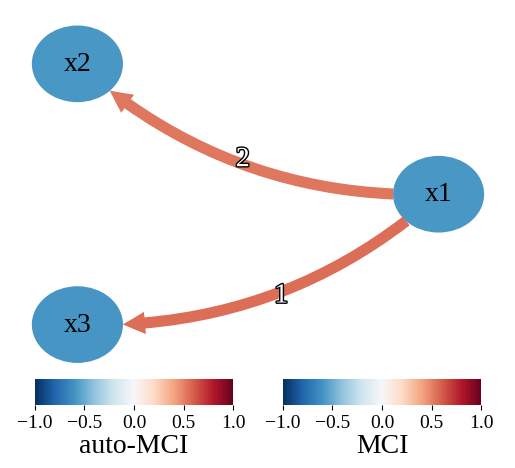

(<Figure size 400x400 with 1 Axes>, <Axes: >)

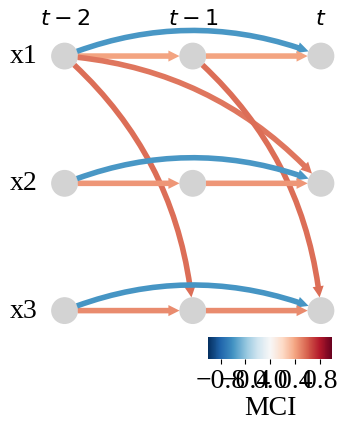

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
#from tigramite.independence_tests import ParCorr

# Função para gerar séries temporais
def generate_time_series(T, C):
    e = np.random.normal(loc=0, scale=0.1, size=(T, 3))
    x = np.zeros((T, 3))

    for t in range(2, T):
        x[t, 0] = 0.5 * x[t-1, 0] - 0.8 * x[t-2, 0] + e[t, 0]
        x[t, 1] = 0.5 * x[t-1, 1] - 0.8 * x[t-2, 1] + C * x[t-1, 0] + (0.7 - C) * x[t-2, 0] + e[t, 1]
        x[t, 2] = 0.5 * x[t-1, 2] - 0.8 * x[t-2, 2] + (0.7 - C) * x[t-1, 0] + C * x[t-2, 0] + e[t, 2]

    df = pd.DataFrame(x, columns=['x1', 'x2', 'x3'])
    return df

# Parâmetros
T = 200  # Tamanho da série temporal
C = 0.  # Coeficiente C

# Gerando séries temporais
df = generate_time_series(T, C)

# Configurando dataframe para Tigramite
var_names = ['x1', 'x2', 'x3']
dataframe = pp.DataFrame(df.values,
                         datatime=np.arange(len(df)),
                         var_names=var_names)

# Configurar e executar PCMCI
pcmci = PCMCI(
    dataframe=dataframe,
    cond_ind_test=ParCorr,
    verbosity=1
)

pcmci.verbosity = 1
tau_max = 2
results = pcmci.run_pcmci(tau_max=tau_max, pc_alpha=None)
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], tau_max=tau_max, fdr_method='fdr_bh')

# Plotar gráfico
tp.plot_graph(graph=results['graph'],
              val_matrix=results['val_matrix'],
              var_names=var_names,
              link_colorbar_label='MCI',
              node_colorbar_label='auto-MCI',
              link_label_fontsize=20,
              label_fontsize=20,
              tick_label_size=14,
              node_label_size=20,
              edge_ticks=0.5,
              node_ticks=0.5,
              node_size=0.5)

plt.show()

tp.plot_time_series_graph(
    figsize=(4, 4),
    val_matrix=results['val_matrix'],
    graph = results['graph'],
    var_names=var_names,
    link_colorbar_label='MCI',
    label_fontsize=20,
    tick_label_size=20
)

In [ ]:
!pip install tigramite


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.4/295.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 10.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.41.1
    Uninstalling llvmlite-0.41.1:
      Successfully uninstalled llvmlite-0.41.1
  Attempting uninstall: numba
    Found existing installation: numba 0.58.1
    Uninstalling numba-0.58.1:
      Successfully uninstalled numba-0.58.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.86 requires numpy>=1.24.1, b

In [ ]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.stats import gaussian_kde
import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite import plotting as tp
from tigramite.models import Models
from tigramite.causal_effects import CausalEffects
import sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
def lin_f(x): return x
coeff = .5
links_coeffs = {
                0: [],
                1: [((0, 0), coeff, lin_f), ((5, 0), coeff, lin_f)],
                2: [((1, 0), coeff, lin_f), ((5, 0), coeff, lin_f)],
                3: [((1, 0), coeff, lin_f), ((2, 0), coeff, lin_f), ((6, 0), coeff, lin_f), ((7, 0), coeff, lin_f)],
                4: [((5, 0), coeff, lin_f), ((7, 0), coeff, lin_f)],
                5: [],
                6: [],
                7: [],
                }
T = 10000
data, nonstat = toys.structural_causal_process(links_coeffs, T=T, noises=None, seed=7)
# Time series no 7 is unobserved confounder
data = data[:, [0,1,2,3,4,5,6]]
dataframe = pp.DataFrame(data)
X= data
Y=lin_f(data)

In [ ]:
lin_f(X)

array([[-0.07555974,  0.40176892,  0.4497183 , ..., -1.2883053 ,
        -1.1230942 ,  0.97366697],
       [ 0.5089432 ,  1.4215627 ,  1.6405787 , ...,  1.2745411 ,
         0.23725803, -0.50111544],
       [-0.79693705, -1.6009941 , -1.9884402 , ..., -0.91217434,
        -1.0188439 ,  0.05527882],
       ...,
       [ 0.18403228,  0.4748602 ,  0.89744425, ..., -0.5247874 ,
         1.1523318 ,  0.16023226],
       [-0.5298535 ,  0.5795682 , -0.02101113, ..., -0.60473067,
        -0.28284106, -0.23398559],
       [ 0.23268819, -1.3207252 ,  0.10700685, ...,  1.1982833 ,
         0.6719095 , -0.7142934 ]], dtype=float32)

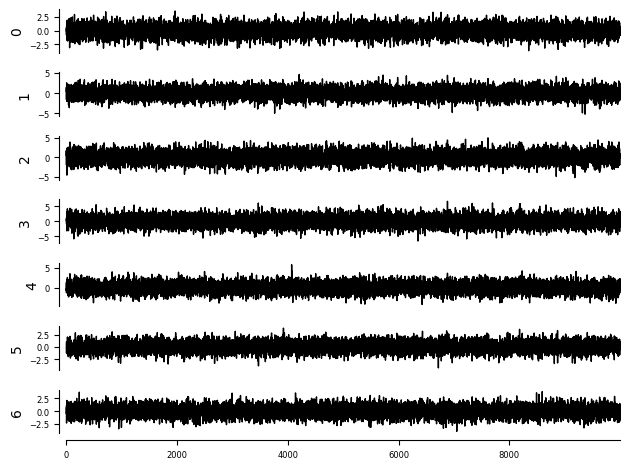

In [ ]:
intervention2 = 0.*np.ones(T)
intervention_data2, nonstat = toys.structural_causal_process(links_coeffs, T=T, noises=None, seed=7,
                                            intervention={X[0][0]:intervention2, X[1][0]:intervention2},
                                            intervention_type='hard',)
# Time series no 7 is unobserved confounder
intervention_data2 = intervention_data2[:, [0,1,2,3,4,5,6]]
tp.plot_timeseries(pp.DataFrame(intervention_data2)); plt.show()

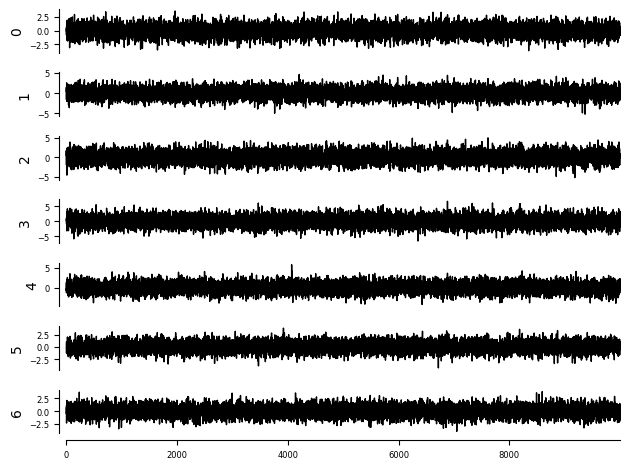

In [ ]:
T = 10000
intervention1 = np.ones(T)
intervention_data1, nonstat = toys.structural_causal_process(
                                       links_coeffs, T=T,
                                       noises=None,
                                       seed=7,
                                       intervention={X[0][0]:intervention1, X[1][0]:intervention1},
                                       intervention_type='hard',)

# Time series no 7 is unobserved confounder
intervention_data1 = intervention_data1[:, [0,1,2,3,4,5,6]]
tp.plot_timeseries(pp.DataFrame(intervention_data1)); plt.show()

In [ ]:
true_effect = (intervention_data1[:, int(Y[0][0])] - intervention_data2[:, int(Y[0][0])]).mean()
print("True effect = %.2f" %true_effect)

True effect = 0.00


In [ ]:
#graph in the toy model
graph =  np.array([['', '-->', '', '', '', '', ''],
                   ['<--', '', '-->', '-->', '', '<--', ''],
                   ['', '<--', '', '-->', '', '<--', ''],
                   ['', '<--', '<--', '', '<->', '', '<--'],
                   ['', '', '', '<->', '', '<--', ''],
                   ['', '-->', '-->', '', '-->', '', ''],
                   ['', '', '', '-->', '', '', '']], dtype='<U3')

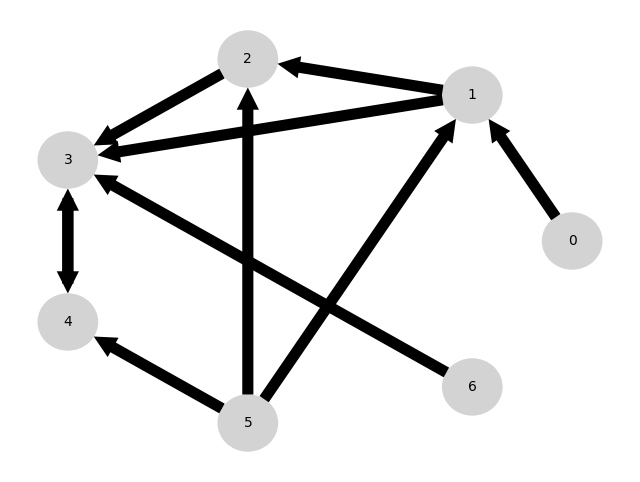

In [ ]:
tp.plot_graph(graph = graph,
        #var_names=var_names,
        save_name='Example.pdf',
        figsize = (8, 6),
        ); plt.show()

In [ ]:
#denotes position in array above: X_1 = first sub-array; X_2 = second sub-array
X = [(0,0), (1,0)]
Y = [(3,0)]

#run CausalEffects
causal_effects = CausalEffects(graph, graph_type='admg', X=X, Y=Y, S=None, hidden_variables=None, verbosity=1)

# Just for plotting purposes
var_names = ['$X_1$', '$X_2$', '$M$', '$Y$', '$Z_1$', '$Z_2$', '$Z_3$']


##
## Initializing CausalEffects class
##

Input:

graph_type = admg
X = [(0, 0), (1, 0)]
Y = [(3, 0)]
S = []
M = [(2, 0)]





In [ ]:
opt = causal_effects.get_optimal_set()
print("Oset = ", [(var_names[v[0]], v[1]) for v in opt])

Oset =  [('$Z_1$', 0), ('$Z_2$', 0), ('$Z_3$', 0)]


In [ ]:
causal_effects.fit_total_effect(
        dataframe=dataframe,
        estimator=LinearRegression(),
        adjustment_set='optimal',
        conditional_estimator=None,
        data_transform=None,
        mask_type=None,
)

In [ ]:
intervention_data = 1.*np.ones((1, 2))
y1 = causal_effects.predict_total_effect(
        intervention_data=intervention_data
        )
print("y1 = ",y1)

intervention_data = 0.*np.ones((1, 2))
y2 = causal_effects.predict_total_effect(
        intervention_data=intervention_data
        )
print("y2 = ",y2)

y1 =  [0.73288052]
y2 =  [-0.00799763]


In [ ]:
beta = (y1 - y2)
print("Causal effect = %.2f" %(beta))

Causal effect = 0.74
